# Polypropylene Stress Relaxation

Fit PP relaxation modulus with GM and fractional models.

**Data:** examples/data/pyRheo/polypropylene/stressrelaxation_pp_data.csv


In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.models.fractional_maxwell_model import FractionalMaxwellModel
from rheojax.models.generalized_maxwell import GeneralizedMaxwell
from rheojax.pipeline.base import Pipeline

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)

def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return float(np.mean(np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), 1e-12)) * 100)

def load_tab_file(path):
    df = pd.read_csv(path, sep='	')
    df.columns = df.columns.str.strip()
    df = df.dropna()
    df.iloc[:,0] = pd.to_numeric(df.iloc[:,0], errors='coerce')
    df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce')
    df = df.dropna()
    return df
import arviz as az


INFO:2025-12-07 17:43:56,183:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Loading rheojax version 0.4.0


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/piblin_jax/__init__.py:28: UserWarning: GPU acceleration is only available on Linux with CUDA 12+. Using JAX in CPU mode.
  from . import backend, data, dataio, transform


Found 'auto' as default backend, checking available backends


Matplotlib is available, defining as default backend


arviz_base available, exposing its functions as part of arviz.preview


arviz_stats available, exposing its functions as part of arviz.preview


arviz_plots available, exposing its functions as part of arviz.preview


## Load relaxation data

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'pyRheo' / 'polypropylene'
df = load_tab_file(DATA_DIR / 'stressrelaxation_pp_data.csv')
t = df.iloc[:,0].to_numpy()
G = df.iloc[:,1].to_numpy()


## Fit relaxation models

In [4]:
gm = GeneralizedMaxwell(n_modes=6, modulus_type='tensile')
gm.fit(t, G, test_mode='relaxation', use_log_residuals=True, use_multi_start=True)
gm_pred = gm.predict(t)
gm_r2 = gm.score(t, G)

fm = FractionalMaxwellModel()
fm.fit(t, G, test_mode='relaxation', use_log_residuals=True)
fm_pred = fm.predict(t, test_mode='relaxation')
fm_r2 = r2_complex(G, fm_pred)

print({'gm_r2': gm_r2, 'fm_r2': fm_r2})


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.121174s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=17 | final_cost=1.812685e+12 | time=1.121s | final_gradient_norm=1958106678816734.2


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.391668s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=17 | final_cost=1.812685e+12 | time=0.392s | final_gradient_norm=1958106678816734.2


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.780500s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=18 | final_cost=7.037632e+12 | time=0.781s | final_gradient_norm=5033769332673842.0


Element minimization: early termination at n_modes=5 (R²=0.999971 < threshold=0.999989)


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


[WARNING] Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Timer: optimization took 1.304228s


Convergence: reason=Inner optimization loop exceeded maximum iterations. | iterations=1 | final_cost=3.794588e+01 | time=1.304s | final_gradient_norm=nan


NLSQ hit inner iteration limit; retrying with SciPy least_squares for stability.


{'gm_r2': 0.9999925080780627, 'fm_r2': -13.056974670032718}


## Plot relaxation fits

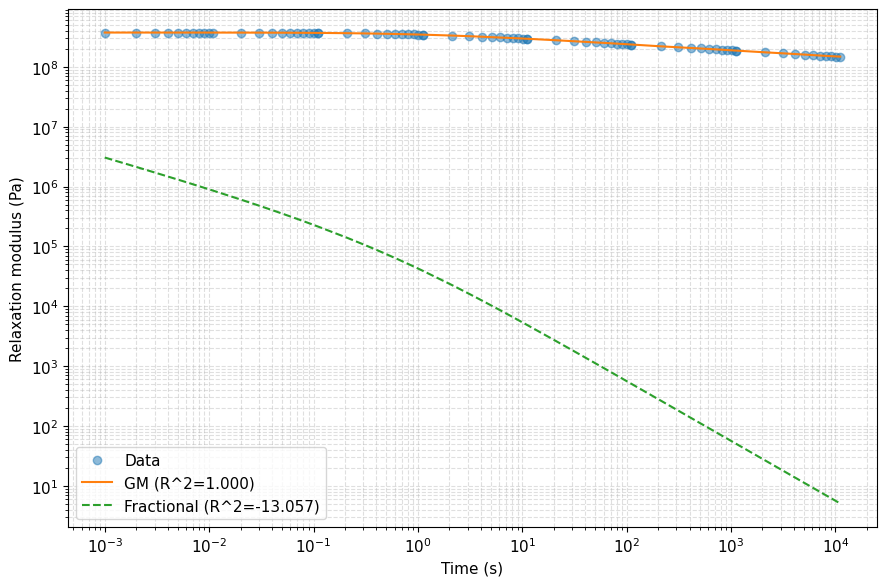

In [5]:
fig, ax = plt.subplots(figsize=(9,6))
ax.loglog(t, G, 'o', label='Data', alpha=0.5)
ax.loglog(t, gm_pred, '-', label=f'GM (R^2={gm_r2:.3f})')
ax.loglog(t, fm_pred, '--', label=f'Fractional (R^2={fm_r2:.3f})')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Relaxation modulus (Pa)')
ax.grid(True, which='both', ls='--', alpha=0.4)
ax.legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.384250s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=17 | final_cost=1.812685e+12 | time=0.384s | final_gradient_norm=1958106678816734.2


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.392047s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=17 | final_cost=1.812685e+12 | time=0.392s | final_gradient_norm=1958106678816734.2


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.379662s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=18 | final_cost=7.037632e+12 | time=0.380s | final_gradient_norm=5033769332673842.0


Element minimization: early termination at n_modes=5 (R²=0.999971 < threshold=0.999989)


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


[WARNING] Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Timer: optimization took 0.672923s


Convergence: reason=Inner optimization loop exceeded maximum iterations. | iterations=1 | final_cost=3.794588e+01 | time=0.673s | final_gradient_norm=nan


NLSQ hit inner iteration limit; retrying with SciPy least_squares for stability.


Model ranking (R²): [('gm', 1.0), ('fm', -13.057)]


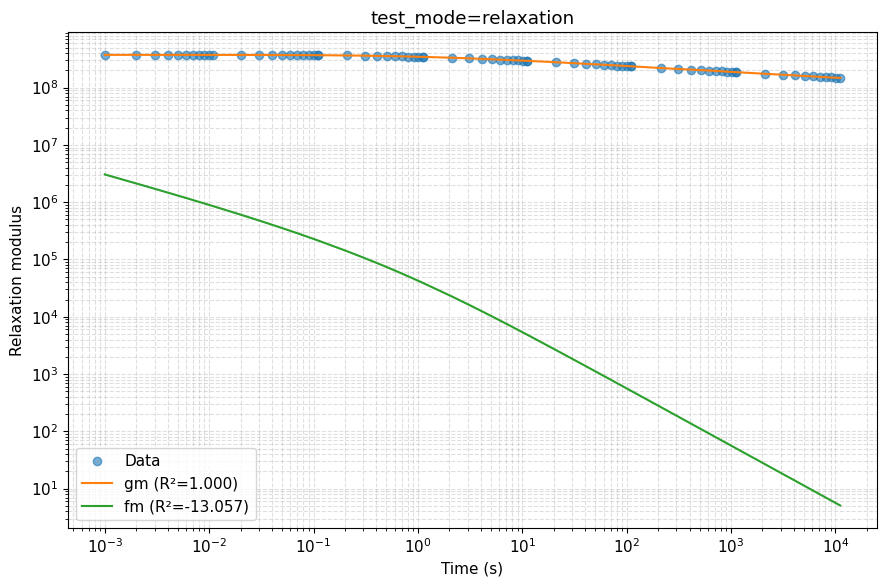

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   0%|          | 1/4000 [00:01<1:10:31,  1.06s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   1%|          | 25/4000 [00:01<02:15, 29.33it/s, 279 steps of size 2.78e-04. acc. prob=0.65]

warmup:   1%|          | 39/4000 [00:01<01:32, 42.95it/s, 5 steps of size 6.08e-05. acc. prob=0.68]  

warmup:   1%|▏         | 52/4000 [00:01<01:11, 55.21it/s, 354 steps of size 1.51e-04. acc. prob=0.71]

warmup:   2%|▏         | 64/4000 [00:01<01:02, 62.70it/s, 1023 steps of size 2.22e-04. acc. prob=0.72]

warmup:   2%|▏         | 75/4000 [00:01<00:55, 71.34it/s, 1023 steps of size 8.19e-05. acc. prob=0.72]

warmup:   2%|▏         | 86/4000 [00:01<00:53, 73.30it/s, 1023 steps of size 1.95e-04. acc. prob=0.73]

warmup:   2%|▏         | 96/4000 [00:01<00:50, 77.49it/s, 511 steps of size 3.01e-04. acc. prob=0.74] 

warmup:   3%|▎         | 106/4000 [00:02<00:47, 82.08it/s, 63 steps of size 8.62e-03. acc. prob=0.75]

warmup:   3%|▎         | 116/4000 [00:02<00:44, 86.33it/s, 1023 steps of size 1.10e-02. acc. prob=0.75]

warmup:   3%|▎         | 127/4000 [00:02<00:42, 90.19it/s, 1023 steps of size 6.22e-03. acc. prob=0.76]

warmup:   3%|▎         | 138/4000 [00:02<00:42, 91.84it/s, 1023 steps of size 9.19e-03. acc. prob=0.76]

warmup:   4%|▍         | 151/4000 [00:02<00:39, 98.54it/s, 1023 steps of size 1.53e-01. acc. prob=0.77]

warmup:   4%|▍         | 162/4000 [00:02<00:38, 99.11it/s, 1023 steps of size 9.94e-03. acc. prob=0.76]

warmup:   4%|▍         | 174/4000 [00:02<00:36, 104.66it/s, 511 steps of size 1.51e-02. acc. prob=0.77]

warmup:   5%|▍         | 187/4000 [00:02<00:35, 107.63it/s, 1023 steps of size 1.61e-02. acc. prob=0.77]

warmup:   5%|▌         | 201/4000 [00:02<00:34, 111.42it/s, 1023 steps of size 5.82e-03. acc. prob=0.77]

warmup:   5%|▌         | 216/4000 [00:03<00:31, 120.79it/s, 255 steps of size 2.03e-02. acc. prob=0.77] 

warmup:   6%|▌         | 229/4000 [00:03<00:30, 121.83it/s, 15 steps of size 2.12e-02. acc. prob=0.77] 

warmup:   6%|▌         | 245/4000 [00:03<00:30, 124.01it/s, 255 steps of size 1.55e-02. acc. prob=0.77]

warmup:   6%|▋         | 259/4000 [00:03<00:29, 126.98it/s, 511 steps of size 7.29e-03. acc. prob=0.77]

warmup:   7%|▋         | 272/4000 [00:03<00:29, 124.43it/s, 255 steps of size 2.25e-02. acc. prob=0.77]

warmup:   7%|▋         | 285/4000 [00:03<00:30, 123.35it/s, 1023 steps of size 5.64e-03. acc. prob=0.77]

warmup:   7%|▋         | 298/4000 [00:03<00:30, 122.12it/s, 255 steps of size 1.44e-02. acc. prob=0.78] 

warmup:   8%|▊         | 314/4000 [00:03<00:28, 129.72it/s, 511 steps of size 1.21e-02. acc. prob=0.78]

warmup:   8%|▊         | 327/4000 [00:03<00:28, 127.20it/s, 511 steps of size 1.11e-02. acc. prob=0.78]

warmup:   9%|▊         | 344/4000 [00:03<00:26, 138.80it/s, 255 steps of size 1.58e-02. acc. prob=0.78]

warmup:   9%|▉         | 360/4000 [00:04<00:25, 142.47it/s, 511 steps of size 1.74e-02. acc. prob=0.78]

warmup:  10%|▉         | 380/4000 [00:04<00:23, 156.99it/s, 255 steps of size 1.41e-02. acc. prob=0.78]

warmup:  10%|▉         | 399/4000 [00:04<00:22, 160.31it/s, 1023 steps of size 1.05e-02. acc. prob=0.78]

warmup:  10%|█         | 419/4000 [00:04<00:20, 170.77it/s, 127 steps of size 1.78e-02. acc. prob=0.78] 

warmup:  11%|█         | 438/4000 [00:04<00:20, 175.91it/s, 959 steps of size 9.84e-03. acc. prob=0.78]

warmup:  12%|█▏        | 460/4000 [00:04<00:19, 181.61it/s, 1023 steps of size 6.44e-03. acc. prob=0.78]

warmup:  12%|█▏        | 479/4000 [00:04<00:20, 168.69it/s, 255 steps of size 2.34e-02. acc. prob=0.78] 

warmup:  12%|█▏        | 497/4000 [00:04<00:22, 156.20it/s, 3 steps of size 4.60e-03. acc. prob=0.78]  

warmup:  13%|█▎        | 513/4000 [00:05<00:24, 142.98it/s, 159 steps of size 1.85e-02. acc. prob=0.78]

warmup:  13%|█▎        | 530/4000 [00:05<00:24, 143.62it/s, 1023 steps of size 9.65e-03. acc. prob=0.78]

warmup:  14%|█▎        | 545/4000 [00:05<00:24, 139.09it/s, 255 steps of size 1.59e-02. acc. prob=0.78] 

warmup:  14%|█▍        | 560/4000 [00:05<00:24, 140.04it/s, 511 steps of size 2.08e-02. acc. prob=0.78]

warmup:  14%|█▍        | 580/4000 [00:05<00:21, 155.47it/s, 255 steps of size 2.57e-02. acc. prob=0.78]

warmup:  15%|█▍        | 596/4000 [00:05<00:22, 154.06it/s, 255 steps of size 1.45e-02. acc. prob=0.78]

warmup:  15%|█▌        | 615/4000 [00:05<00:20, 163.48it/s, 511 steps of size 1.79e-02. acc. prob=0.78]

warmup:  16%|█▌        | 632/4000 [00:05<00:21, 155.66it/s, 511 steps of size 1.73e-02. acc. prob=0.78]

warmup:  16%|█▋        | 651/4000 [00:05<00:20, 162.71it/s, 511 steps of size 1.63e-02. acc. prob=0.79]

warmup:  17%|█▋        | 669/4000 [00:06<00:20, 163.02it/s, 511 steps of size 2.06e-02. acc. prob=0.79]

warmup:  17%|█▋        | 690/4000 [00:06<00:18, 175.13it/s, 511 steps of size 1.66e-02. acc. prob=0.79]

warmup:  18%|█▊        | 708/4000 [00:06<00:19, 171.51it/s, 255 steps of size 1.39e-02. acc. prob=0.79]

warmup:  18%|█▊        | 730/4000 [00:06<00:17, 184.27it/s, 127 steps of size 2.17e-02. acc. prob=0.79]

warmup:  19%|█▊        | 749/4000 [00:06<00:17, 182.25it/s, 255 steps of size 1.52e-02. acc. prob=0.79]

warmup:  19%|█▉        | 773/4000 [00:06<00:16, 194.31it/s, 511 steps of size 2.04e-02. acc. prob=0.79]

warmup:  20%|█▉        | 797/4000 [00:06<00:15, 205.36it/s, 255 steps of size 2.05e-02. acc. prob=0.79]

warmup:  20%|██        | 818/4000 [00:06<00:16, 188.43it/s, 511 steps of size 1.12e-02. acc. prob=0.79]

warmup:  21%|██        | 838/4000 [00:06<00:17, 178.74it/s, 6 steps of size 1.08e-02. acc. prob=0.79]  

warmup:  21%|██▏       | 857/4000 [00:07<00:17, 180.12it/s, 255 steps of size 2.04e-02. acc. prob=0.79]

warmup:  22%|██▏       | 876/4000 [00:07<00:18, 171.10it/s, 127 steps of size 1.81e-02. acc. prob=0.79]

warmup:  22%|██▏       | 895/4000 [00:07<00:17, 175.82it/s, 255 steps of size 1.54e-02. acc. prob=0.79]

warmup:  23%|██▎       | 915/4000 [00:07<00:17, 181.31it/s, 206 steps of size 2.28e-02. acc. prob=0.79]

warmup:  23%|██▎       | 938/4000 [00:07<00:16, 190.05it/s, 511 steps of size 1.09e-02. acc. prob=0.79]

warmup:  24%|██▍       | 958/4000 [00:07<00:16, 182.26it/s, 511 steps of size 1.81e-02. acc. prob=0.79]

warmup:  24%|██▍       | 977/4000 [00:07<00:18, 165.88it/s, 7 steps of size 2.54e-03. acc. prob=0.79]  

warmup:  25%|██▍       | 994/4000 [00:07<00:19, 152.54it/s, 511 steps of size 7.16e-03. acc. prob=0.79]

sample:  25%|██▌       | 1012/4000 [00:07<00:18, 159.40it/s, 511 steps of size 1.10e-02. acc. prob=0.96]

sample:  26%|██▌       | 1029/4000 [00:08<00:19, 152.99it/s, 319 steps of size 1.10e-02. acc. prob=0.97]

sample:  26%|██▌       | 1046/4000 [00:08<00:19, 155.45it/s, 511 steps of size 1.10e-02. acc. prob=0.96]

sample:  27%|██▋       | 1062/4000 [00:08<00:19, 153.50it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  27%|██▋       | 1078/4000 [00:08<00:19, 149.85it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  27%|██▋       | 1095/4000 [00:08<00:18, 154.75it/s, 159 steps of size 1.10e-02. acc. prob=0.95]

sample:  28%|██▊       | 1111/4000 [00:08<00:19, 148.67it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  28%|██▊       | 1126/4000 [00:08<00:20, 141.22it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  29%|██▊       | 1141/4000 [00:08<00:20, 136.90it/s, 95 steps of size 1.10e-02. acc. prob=0.95] 

sample:  29%|██▉       | 1157/4000 [00:08<00:20, 138.12it/s, 767 steps of size 1.10e-02. acc. prob=0.95]

sample:  29%|██▉       | 1173/4000 [00:09<00:19, 143.82it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  30%|██▉       | 1190/4000 [00:09<00:19, 146.24it/s, 767 steps of size 1.10e-02. acc. prob=0.94]

sample:  30%|███       | 1205/4000 [00:09<00:19, 146.70it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  31%|███       | 1223/4000 [00:09<00:17, 154.69it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  31%|███       | 1240/4000 [00:09<00:17, 157.71it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  31%|███▏      | 1258/4000 [00:09<00:17, 160.87it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  32%|███▏      | 1275/4000 [00:09<00:17, 155.45it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  32%|███▏      | 1293/4000 [00:09<00:17, 159.11it/s, 895 steps of size 1.10e-02. acc. prob=0.95]

sample:  33%|███▎      | 1312/4000 [00:09<00:16, 165.86it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  33%|███▎      | 1329/4000 [00:10<00:16, 157.89it/s, 31 steps of size 1.10e-02. acc. prob=0.95] 

sample:  34%|███▎      | 1347/4000 [00:10<00:16, 163.00it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  34%|███▍      | 1364/4000 [00:10<00:16, 155.68it/s, 95 steps of size 1.10e-02. acc. prob=0.95] 

sample:  34%|███▍      | 1380/4000 [00:10<00:17, 150.67it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  35%|███▍      | 1399/4000 [00:10<00:16, 158.02it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  35%|███▌      | 1415/4000 [00:10<00:17, 150.97it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  36%|███▌      | 1431/4000 [00:10<00:17, 144.87it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  36%|███▌      | 1448/4000 [00:10<00:17, 149.04it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  37%|███▋      | 1465/4000 [00:10<00:16, 151.11it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  37%|███▋      | 1481/4000 [00:11<00:17, 141.14it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  37%|███▋      | 1496/4000 [00:11<00:17, 140.81it/s, 127 steps of size 1.10e-02. acc. prob=0.95]

sample:  38%|███▊      | 1511/4000 [00:11<00:17, 139.36it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  38%|███▊      | 1530/4000 [00:11<00:16, 152.00it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  39%|███▊      | 1546/4000 [00:11<00:16, 149.46it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  39%|███▉      | 1562/4000 [00:11<00:16, 144.53it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  39%|███▉      | 1577/4000 [00:11<00:16, 144.78it/s, 127 steps of size 1.10e-02. acc. prob=0.95]

sample:  40%|███▉      | 1592/4000 [00:11<00:16, 143.11it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  40%|████      | 1607/4000 [00:11<00:16, 141.90it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  41%|████      | 1623/4000 [00:12<00:16, 145.18it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  41%|████      | 1638/4000 [00:12<00:17, 138.79it/s, 1023 steps of size 1.10e-02. acc. prob=0.95]

sample:  41%|████▏     | 1656/4000 [00:12<00:15, 147.01it/s, 511 steps of size 1.10e-02. acc. prob=0.94] 

sample:  42%|████▏     | 1672/4000 [00:12<00:15, 150.20it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  42%|████▏     | 1690/4000 [00:12<00:14, 157.15it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  43%|████▎     | 1707/4000 [00:12<00:14, 159.26it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  43%|████▎     | 1723/4000 [00:12<00:14, 156.17it/s, 367 steps of size 1.10e-02. acc. prob=0.95]

sample:  44%|████▎     | 1741/4000 [00:12<00:13, 162.86it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  44%|████▍     | 1758/4000 [00:12<00:14, 154.42it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  44%|████▍     | 1774/4000 [00:13<00:14, 153.80it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  45%|████▍     | 1790/4000 [00:13<00:14, 154.70it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  45%|████▌     | 1806/4000 [00:13<00:14, 146.92it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  46%|████▌     | 1821/4000 [00:13<00:15, 144.16it/s, 255 steps of size 1.10e-02. acc. prob=0.94]

sample:  46%|████▌     | 1836/4000 [00:13<00:14, 145.27it/s, 255 steps of size 1.10e-02. acc. prob=0.94]

sample:  46%|████▋     | 1852/4000 [00:13<00:14, 149.02it/s, 255 steps of size 1.10e-02. acc. prob=0.94]

sample:  47%|████▋     | 1868/4000 [00:13<00:14, 147.10it/s, 1023 steps of size 1.10e-02. acc. prob=0.94]

sample:  47%|████▋     | 1883/4000 [00:13<00:16, 131.18it/s, 511 steps of size 1.10e-02. acc. prob=0.94] 

sample:  47%|████▋     | 1897/4000 [00:13<00:16, 125.96it/s, 255 steps of size 1.10e-02. acc. prob=0.94]

sample:  48%|████▊     | 1912/4000 [00:14<00:16, 129.35it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  48%|████▊     | 1927/4000 [00:14<00:15, 133.26it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  49%|████▊     | 1943/4000 [00:14<00:14, 139.44it/s, 255 steps of size 1.10e-02. acc. prob=0.94]

sample:  49%|████▉     | 1958/4000 [00:14<00:14, 139.32it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  49%|████▉     | 1973/4000 [00:14<00:14, 139.57it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  50%|████▉     | 1989/4000 [00:14<00:14, 142.21it/s, 767 steps of size 1.10e-02. acc. prob=0.94]

sample:  50%|█████     | 2004/4000 [00:14<00:14, 139.23it/s, 255 steps of size 1.10e-02. acc. prob=0.94]

sample:  50%|█████     | 2018/4000 [00:14<00:14, 136.43it/s, 511 steps of size 1.10e-02. acc. prob=0.94]

sample:  51%|█████     | 2034/4000 [00:14<00:14, 139.00it/s, 767 steps of size 1.10e-02. acc. prob=0.94]

sample:  51%|█████     | 2049/4000 [00:15<00:13, 140.12it/s, 447 steps of size 1.10e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2064/4000 [00:15<00:14, 134.47it/s, 255 steps of size 1.10e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2079/4000 [00:15<00:14, 135.85it/s, 447 steps of size 1.10e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2095/4000 [00:15<00:13, 138.99it/s, 767 steps of size 1.10e-02. acc. prob=0.94]

sample:  53%|█████▎    | 2110/4000 [00:15<00:13, 140.53it/s, 287 steps of size 1.10e-02. acc. prob=0.95]

sample:  53%|█████▎    | 2126/4000 [00:15<00:12, 145.87it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  54%|█████▎    | 2141/4000 [00:15<00:13, 141.78it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  54%|█████▍    | 2156/4000 [00:15<00:13, 138.25it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  54%|█████▍    | 2176/4000 [00:15<00:11, 153.96it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  55%|█████▍    | 2192/4000 [00:16<00:12, 148.43it/s, 127 steps of size 1.10e-02. acc. prob=0.95]

sample:  55%|█████▌    | 2208/4000 [00:16<00:11, 150.17it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  56%|█████▌    | 2224/4000 [00:16<00:11, 148.90it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  56%|█████▌    | 2239/4000 [00:16<00:11, 146.95it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  56%|█████▋    | 2256/4000 [00:16<00:11, 151.60it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  57%|█████▋    | 2272/4000 [00:16<00:11, 153.42it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  57%|█████▋    | 2291/4000 [00:16<00:10, 162.43it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  58%|█████▊    | 2308/4000 [00:16<00:10, 156.71it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  58%|█████▊    | 2324/4000 [00:16<00:11, 141.00it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  58%|█████▊    | 2339/4000 [00:16<00:11, 142.02it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  59%|█████▉    | 2354/4000 [00:17<00:11, 140.36it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  59%|█████▉    | 2369/4000 [00:17<00:11, 140.63it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  60%|█████▉    | 2384/4000 [00:17<00:11, 139.63it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  60%|██████    | 2400/4000 [00:17<00:11, 142.00it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  60%|██████    | 2415/4000 [00:17<00:11, 132.16it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  61%|██████    | 2433/4000 [00:17<00:10, 143.49it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  61%|██████    | 2449/4000 [00:17<00:10, 145.25it/s, 415 steps of size 1.10e-02. acc. prob=0.95]

sample:  62%|██████▏   | 2464/4000 [00:17<00:11, 138.12it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  62%|██████▏   | 2481/4000 [00:17<00:10, 144.76it/s, 351 steps of size 1.10e-02. acc. prob=0.95]

sample:  62%|██████▏   | 2497/4000 [00:18<00:10, 148.62it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  63%|██████▎   | 2512/4000 [00:18<00:10, 144.75it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  63%|██████▎   | 2528/4000 [00:18<00:10, 146.38it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  64%|██████▎   | 2543/4000 [00:18<00:09, 146.03it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  64%|██████▍   | 2558/4000 [00:18<00:09, 144.63it/s, 351 steps of size 1.10e-02. acc. prob=0.95]

sample:  64%|██████▍   | 2573/4000 [00:18<00:09, 143.42it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  65%|██████▍   | 2591/4000 [00:18<00:09, 151.33it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  65%|██████▌   | 2607/4000 [00:18<00:09, 139.43it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  66%|██████▌   | 2622/4000 [00:19<00:10, 130.87it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  66%|██████▌   | 2637/4000 [00:19<00:10, 135.65it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  66%|██████▋   | 2652/4000 [00:19<00:09, 137.15it/s, 767 steps of size 1.10e-02. acc. prob=0.95]

sample:  67%|██████▋   | 2666/4000 [00:19<00:09, 136.80it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  67%|██████▋   | 2680/4000 [00:19<00:09, 137.05it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  67%|██████▋   | 2694/4000 [00:19<00:10, 129.10it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  68%|██████▊   | 2709/4000 [00:19<00:09, 133.99it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  68%|██████▊   | 2725/4000 [00:19<00:09, 136.99it/s, 1023 steps of size 1.10e-02. acc. prob=0.95]

sample:  68%|██████▊   | 2739/4000 [00:19<00:09, 132.27it/s, 255 steps of size 1.10e-02. acc. prob=0.95] 

sample:  69%|██████▉   | 2753/4000 [00:19<00:09, 133.72it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  69%|██████▉   | 2767/4000 [00:20<00:09, 133.60it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  70%|██████▉   | 2782/4000 [00:20<00:08, 136.99it/s, 1023 steps of size 1.10e-02. acc. prob=0.95]

sample:  70%|██████▉   | 2799/4000 [00:20<00:08, 143.78it/s, 511 steps of size 1.10e-02. acc. prob=0.95] 

sample:  70%|███████   | 2815/4000 [00:20<00:08, 145.40it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  71%|███████   | 2832/4000 [00:20<00:07, 151.42it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  71%|███████   | 2848/4000 [00:20<00:08, 143.27it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  72%|███████▏  | 2863/4000 [00:20<00:08, 141.98it/s, 319 steps of size 1.10e-02. acc. prob=0.95]

sample:  72%|███████▏  | 2878/4000 [00:20<00:08, 137.94it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  72%|███████▏  | 2893/4000 [00:20<00:07, 139.49it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  73%|███████▎  | 2909/4000 [00:21<00:07, 143.05it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  73%|███████▎  | 2924/4000 [00:21<00:07, 141.16it/s, 127 steps of size 1.10e-02. acc. prob=0.95]

sample:  73%|███████▎  | 2939/4000 [00:21<00:07, 134.68it/s, 223 steps of size 1.10e-02. acc. prob=0.95]

sample:  74%|███████▍  | 2953/4000 [00:21<00:07, 131.64it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  74%|███████▍  | 2969/4000 [00:21<00:07, 139.35it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  75%|███████▍  | 2984/4000 [00:21<00:07, 137.47it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  75%|███████▍  | 2998/4000 [00:21<00:07, 135.75it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  75%|███████▌  | 3012/4000 [00:21<00:07, 133.28it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  76%|███████▌  | 3029/4000 [00:21<00:06, 142.99it/s, 447 steps of size 1.10e-02. acc. prob=0.95]

sample:  76%|███████▌  | 3044/4000 [00:22<00:07, 130.88it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  76%|███████▋  | 3059/4000 [00:22<00:07, 134.27it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  77%|███████▋  | 3073/4000 [00:22<00:07, 130.90it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  77%|███████▋  | 3087/4000 [00:22<00:06, 131.16it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  78%|███████▊  | 3105/4000 [00:22<00:06, 142.75it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  78%|███████▊  | 3122/4000 [00:22<00:05, 150.11it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  78%|███████▊  | 3138/4000 [00:22<00:05, 150.25it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  79%|███████▉  | 3154/4000 [00:22<00:05, 150.42it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  79%|███████▉  | 3170/4000 [00:22<00:06, 135.93it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  80%|███████▉  | 3185/4000 [00:23<00:05, 139.07it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  80%|████████  | 3201/4000 [00:23<00:05, 141.51it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  80%|████████  | 3216/4000 [00:23<00:05, 138.95it/s, 767 steps of size 1.10e-02. acc. prob=0.95]

sample:  81%|████████  | 3231/4000 [00:23<00:05, 133.16it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  81%|████████  | 3248/4000 [00:23<00:05, 142.84it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  82%|████████▏ | 3264/4000 [00:23<00:05, 146.51it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  82%|████████▏ | 3280/4000 [00:23<00:04, 149.34it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  82%|████████▏ | 3296/4000 [00:23<00:05, 131.81it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  83%|████████▎ | 3312/4000 [00:23<00:04, 137.72it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  83%|████████▎ | 3327/4000 [00:24<00:04, 136.42it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  84%|████████▎ | 3343/4000 [00:24<00:04, 141.46it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  84%|████████▍ | 3358/4000 [00:24<00:04, 132.83it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  84%|████████▍ | 3372/4000 [00:24<00:04, 132.63it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  85%|████████▍ | 3387/4000 [00:24<00:04, 136.31it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  85%|████████▌ | 3402/4000 [00:24<00:04, 137.30it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  85%|████████▌ | 3416/4000 [00:24<00:04, 133.12it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  86%|████████▌ | 3430/4000 [00:24<00:04, 133.64it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  86%|████████▌ | 3446/4000 [00:24<00:03, 141.01it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  87%|████████▋ | 3462/4000 [00:25<00:03, 144.49it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  87%|████████▋ | 3477/4000 [00:25<00:03, 135.89it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  87%|████████▋ | 3491/4000 [00:25<00:03, 134.55it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  88%|████████▊ | 3505/4000 [00:25<00:03, 132.91it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  88%|████████▊ | 3523/4000 [00:25<00:03, 144.51it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  89%|████████▊ | 3541/4000 [00:25<00:02, 153.24it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  89%|████████▉ | 3557/4000 [00:25<00:03, 135.78it/s, 767 steps of size 1.10e-02. acc. prob=0.95]

sample:  89%|████████▉ | 3571/4000 [00:25<00:03, 129.17it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  90%|████████▉ | 3589/4000 [00:25<00:02, 140.57it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  90%|█████████ | 3605/4000 [00:26<00:02, 142.93it/s, 639 steps of size 1.10e-02. acc. prob=0.95]

sample:  91%|█████████ | 3621/4000 [00:26<00:02, 145.46it/s, 319 steps of size 1.10e-02. acc. prob=0.95]

sample:  91%|█████████ | 3636/4000 [00:26<00:02, 142.93it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  91%|█████████▏| 3653/4000 [00:26<00:02, 149.68it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  92%|█████████▏| 3669/4000 [00:26<00:02, 135.32it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  92%|█████████▏| 3684/4000 [00:26<00:02, 139.07it/s, 7 steps of size 1.10e-02. acc. prob=0.95]  

sample:  93%|█████████▎| 3701/4000 [00:26<00:02, 144.48it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  93%|█████████▎| 3716/4000 [00:26<00:02, 141.54it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  93%|█████████▎| 3731/4000 [00:26<00:01, 138.94it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  94%|█████████▎| 3746/4000 [00:27<00:01, 136.69it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  94%|█████████▍| 3760/4000 [00:27<00:01, 136.24it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  94%|█████████▍| 3776/4000 [00:27<00:01, 140.64it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  95%|█████████▍| 3791/4000 [00:27<00:01, 140.49it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  95%|█████████▌| 3806/4000 [00:27<00:01, 141.22it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  96%|█████████▌| 3823/4000 [00:27<00:01, 149.31it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  96%|█████████▌| 3838/4000 [00:27<00:01, 144.49it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  96%|█████████▋| 3853/4000 [00:27<00:01, 144.15it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  97%|█████████▋| 3868/4000 [00:27<00:00, 138.82it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  97%|█████████▋| 3883/4000 [00:28<00:00, 139.62it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  97%|█████████▋| 3898/4000 [00:28<00:00, 137.34it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  98%|█████████▊| 3913/4000 [00:28<00:00, 139.59it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  98%|█████████▊| 3929/4000 [00:28<00:00, 143.66it/s, 255 steps of size 1.10e-02. acc. prob=0.95]

sample:  99%|█████████▊| 3944/4000 [00:28<00:00, 139.55it/s, 31 steps of size 1.10e-02. acc. prob=0.95] 

sample:  99%|█████████▉| 3959/4000 [00:28<00:00, 140.15it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample:  99%|█████████▉| 3974/4000 [00:28<00:00, 138.95it/s, 63 steps of size 1.10e-02. acc. prob=0.95] 

sample: 100%|█████████▉| 3988/4000 [00:28<00:00, 135.68it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

sample: 100%|██████████| 4000/4000 [00:28<00:00, 138.36it/s, 511 steps of size 1.10e-02. acc. prob=0.95]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   0%|          | 19/4000 [00:00<00:22, 177.04it/s, 468 steps of size 3.07e-04. acc. prob=0.62]

warmup:   1%|          | 37/4000 [00:00<00:36, 109.15it/s, 1023 steps of size 2.97e-04. acc. prob=0.69]

warmup:   1%|▏         | 50/4000 [00:00<00:39, 100.02it/s, 1023 steps of size 3.45e-04. acc. prob=0.71]

warmup:   2%|▏         | 61/4000 [00:00<00:45, 86.50it/s, 1023 steps of size 9.00e-05. acc. prob=0.71] 

warmup:   2%|▏         | 71/4000 [00:00<00:47, 82.55it/s, 1023 steps of size 3.22e-04. acc. prob=0.73]

warmup:   2%|▏         | 80/4000 [00:00<00:50, 78.07it/s, 1023 steps of size 1.94e-04. acc. prob=0.73]

warmup:   2%|▏         | 88/4000 [00:01<00:52, 74.48it/s, 1023 steps of size 1.82e-04. acc. prob=0.74]

warmup:   2%|▏         | 96/4000 [00:01<00:52, 74.25it/s, 1023 steps of size 2.08e-04. acc. prob=0.74]

warmup:   3%|▎         | 104/4000 [00:01<00:55, 70.80it/s, 1023 steps of size 1.28e-02. acc. prob=0.75]

warmup:   3%|▎         | 115/4000 [00:01<00:49, 78.49it/s, 1023 steps of size 3.53e-03. acc. prob=0.75]

warmup:   3%|▎         | 126/4000 [00:01<00:46, 83.74it/s, 1023 steps of size 3.87e-03. acc. prob=0.75]

warmup:   3%|▎         | 138/4000 [00:01<00:43, 89.69it/s, 1023 steps of size 7.95e-03. acc. prob=0.76]

warmup:   4%|▍         | 153/4000 [00:01<00:36, 105.72it/s, 511 steps of size 6.92e-03. acc. prob=0.76]

warmup:   4%|▍         | 166/4000 [00:01<00:35, 109.11it/s, 1023 steps of size 1.65e-02. acc. prob=0.77]

warmup:   5%|▍         | 181/4000 [00:01<00:32, 117.83it/s, 1023 steps of size 7.61e-03. acc. prob=0.77]

warmup:   5%|▍         | 196/4000 [00:02<00:30, 123.79it/s, 511 steps of size 1.59e-02. acc. prob=0.77] 

warmup:   5%|▌         | 211/4000 [00:02<00:29, 129.45it/s, 511 steps of size 9.34e-03. acc. prob=0.77]

warmup:   6%|▌         | 226/4000 [00:02<00:27, 134.88it/s, 511 steps of size 1.40e-02. acc. prob=0.77]

warmup:   6%|▌         | 246/4000 [00:02<00:24, 151.86it/s, 255 steps of size 1.71e-02. acc. prob=0.77]

warmup:   7%|▋         | 262/4000 [00:02<00:24, 151.59it/s, 223 steps of size 2.07e-02. acc. prob=0.77]

warmup:   7%|▋         | 278/4000 [00:02<00:24, 149.28it/s, 41 steps of size 8.77e-03. acc. prob=0.77] 

warmup:   7%|▋         | 293/4000 [00:02<00:27, 136.14it/s, 511 steps of size 9.41e-03. acc. prob=0.77]

warmup:   8%|▊         | 310/4000 [00:02<00:25, 141.99it/s, 511 steps of size 1.40e-02. acc. prob=0.78]

warmup:   8%|▊         | 325/4000 [00:02<00:27, 131.79it/s, 511 steps of size 1.38e-02. acc. prob=0.78]

warmup:   8%|▊         | 339/4000 [00:03<00:27, 133.87it/s, 5 steps of size 7.41e-03. acc. prob=0.78]  

warmup:   9%|▉         | 354/4000 [00:03<00:26, 135.33it/s, 1023 steps of size 1.17e-02. acc. prob=0.78]

warmup:   9%|▉         | 370/4000 [00:03<00:25, 140.48it/s, 511 steps of size 1.48e-02. acc. prob=0.78] 

warmup:  10%|▉         | 386/4000 [00:03<00:24, 145.35it/s, 255 steps of size 1.89e-02. acc. prob=0.78]

warmup:  10%|█         | 405/4000 [00:03<00:22, 157.54it/s, 255 steps of size 2.20e-02. acc. prob=0.78]

warmup:  11%|█         | 421/4000 [00:03<00:23, 152.78it/s, 511 steps of size 1.12e-02. acc. prob=0.78]

warmup:  11%|█         | 440/4000 [00:03<00:22, 160.77it/s, 511 steps of size 1.70e-02. acc. prob=0.78]

warmup:  11%|█▏        | 459/4000 [00:03<00:21, 168.13it/s, 511 steps of size 8.80e-03. acc. prob=0.78]

warmup:  12%|█▏        | 476/4000 [00:03<00:22, 156.99it/s, 1023 steps of size 7.49e-03. acc. prob=0.78]

warmup:  12%|█▏        | 494/4000 [00:04<00:22, 159.31it/s, 511 steps of size 1.32e-02. acc. prob=0.78] 

warmup:  13%|█▎        | 511/4000 [00:04<00:24, 141.86it/s, 6 steps of size 1.05e-02. acc. prob=0.78]  

warmup:  13%|█▎        | 528/4000 [00:04<00:23, 148.80it/s, 191 steps of size 1.82e-02. acc. prob=0.78]

warmup:  14%|█▎        | 544/4000 [00:04<00:22, 150.96it/s, 127 steps of size 2.31e-02. acc. prob=0.78]

warmup:  14%|█▍        | 560/4000 [00:04<00:23, 143.67it/s, 255 steps of size 1.70e-02. acc. prob=0.78]

warmup:  14%|█▍        | 579/4000 [00:04<00:21, 155.87it/s, 255 steps of size 1.77e-02. acc. prob=0.78]

warmup:  15%|█▍        | 598/4000 [00:04<00:20, 164.71it/s, 255 steps of size 1.25e-02. acc. prob=0.78]

warmup:  15%|█▌        | 617/4000 [00:04<00:19, 171.64it/s, 255 steps of size 2.04e-02. acc. prob=0.78]

warmup:  16%|█▌        | 639/4000 [00:04<00:18, 185.47it/s, 255 steps of size 1.21e-02. acc. prob=0.78]

warmup:  16%|█▋        | 658/4000 [00:05<00:18, 177.14it/s, 255 steps of size 1.54e-02. acc. prob=0.79]

warmup:  17%|█▋        | 678/4000 [00:05<00:18, 182.13it/s, 127 steps of size 1.41e-02. acc. prob=0.79]

warmup:  18%|█▊        | 701/4000 [00:05<00:17, 190.82it/s, 511 steps of size 1.64e-02. acc. prob=0.79]

warmup:  18%|█▊        | 722/4000 [00:05<00:16, 196.00it/s, 127 steps of size 1.90e-02. acc. prob=0.79]

warmup:  19%|█▊        | 742/4000 [00:05<00:16, 196.24it/s, 255 steps of size 1.72e-02. acc. prob=0.79]

warmup:  19%|█▉        | 762/4000 [00:05<00:16, 191.41it/s, 7 steps of size 8.74e-03. acc. prob=0.79]  

warmup:  20%|█▉        | 782/4000 [00:05<00:16, 189.63it/s, 511 steps of size 1.49e-02. acc. prob=0.79]

warmup:  20%|██        | 802/4000 [00:05<00:18, 175.83it/s, 255 steps of size 1.81e-02. acc. prob=0.79]

warmup:  21%|██        | 823/4000 [00:05<00:17, 182.89it/s, 255 steps of size 2.03e-02. acc. prob=0.79]

warmup:  21%|██        | 844/4000 [00:05<00:16, 187.09it/s, 339 steps of size 9.34e-03. acc. prob=0.79]

warmup:  22%|██▏       | 866/4000 [00:06<00:16, 195.72it/s, 255 steps of size 1.91e-02. acc. prob=0.79]

warmup:  22%|██▏       | 891/4000 [00:06<00:14, 209.52it/s, 255 steps of size 1.31e-02. acc. prob=0.79]

warmup:  23%|██▎       | 914/4000 [00:06<00:14, 213.84it/s, 319 steps of size 1.47e-02. acc. prob=0.79]

warmup:  23%|██▎       | 936/4000 [00:06<00:14, 207.92it/s, 57 steps of size 1.83e-02. acc. prob=0.79] 

warmup:  24%|██▍       | 957/4000 [00:06<00:15, 190.99it/s, 511 steps of size 1.79e-02. acc. prob=0.79]

warmup:  24%|██▍       | 977/4000 [00:06<00:18, 164.70it/s, 1023 steps of size 5.52e-03. acc. prob=0.79]

warmup:  25%|██▍       | 995/4000 [00:06<00:19, 152.29it/s, 255 steps of size 1.66e-02. acc. prob=0.79] 

sample:  25%|██▌       | 1011/4000 [00:06<00:19, 151.97it/s, 255 steps of size 1.11e-02. acc. prob=0.97]

sample:  26%|██▌       | 1027/4000 [00:07<00:19, 152.34it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  26%|██▌       | 1043/4000 [00:07<00:19, 148.33it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  26%|██▋       | 1059/4000 [00:07<00:20, 143.91it/s, 255 steps of size 1.11e-02. acc. prob=0.93]

sample:  27%|██▋       | 1075/4000 [00:07<00:19, 148.02it/s, 255 steps of size 1.11e-02. acc. prob=0.93]

sample:  27%|██▋       | 1090/4000 [00:07<00:19, 146.07it/s, 255 steps of size 1.11e-02. acc. prob=0.93]

sample:  28%|██▊       | 1105/4000 [00:07<00:20, 142.94it/s, 255 steps of size 1.11e-02. acc. prob=0.93]

sample:  28%|██▊       | 1122/4000 [00:07<00:19, 147.01it/s, 1023 steps of size 1.11e-02. acc. prob=0.93]

sample:  28%|██▊       | 1137/4000 [00:07<00:21, 134.78it/s, 511 steps of size 1.11e-02. acc. prob=0.93] 

sample:  29%|██▉       | 1151/4000 [00:07<00:21, 130.75it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  29%|██▉       | 1169/4000 [00:08<00:19, 143.71it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  30%|██▉       | 1185/4000 [00:08<00:19, 145.97it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  30%|███       | 1200/4000 [00:08<00:19, 144.36it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  30%|███       | 1215/4000 [00:08<00:19, 140.22it/s, 255 steps of size 1.11e-02. acc. prob=0.93]

sample:  31%|███       | 1230/4000 [00:08<00:19, 141.67it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  31%|███       | 1245/4000 [00:08<00:20, 136.67it/s, 255 steps of size 1.11e-02. acc. prob=0.93]

sample:  32%|███▏      | 1261/4000 [00:08<00:19, 139.86it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  32%|███▏      | 1276/4000 [00:08<00:19, 136.78it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  32%|███▏      | 1290/4000 [00:08<00:20, 134.80it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  33%|███▎      | 1304/4000 [00:09<00:20, 134.50it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  33%|███▎      | 1318/4000 [00:09<00:20, 131.45it/s, 255 steps of size 1.11e-02. acc. prob=0.93]

sample:  33%|███▎      | 1332/4000 [00:09<00:20, 130.90it/s, 415 steps of size 1.11e-02. acc. prob=0.93]

sample:  34%|███▎      | 1346/4000 [00:09<00:21, 122.17it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  34%|███▍      | 1359/4000 [00:09<00:21, 123.49it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  34%|███▍      | 1372/4000 [00:09<00:21, 122.17it/s, 127 steps of size 1.11e-02. acc. prob=0.93]

sample:  35%|███▍      | 1385/4000 [00:09<00:21, 123.17it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  35%|███▌      | 1402/4000 [00:09<00:19, 134.57it/s, 511 steps of size 1.11e-02. acc. prob=0.93]

sample:  35%|███▌      | 1416/4000 [00:09<00:19, 134.16it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  36%|███▌      | 1430/4000 [00:10<00:19, 134.07it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  36%|███▌      | 1444/4000 [00:10<00:19, 129.97it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  36%|███▋      | 1458/4000 [00:10<00:19, 130.32it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  37%|███▋      | 1472/4000 [00:10<00:19, 131.84it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  37%|███▋      | 1486/4000 [00:10<00:18, 132.42it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  38%|███▊      | 1500/4000 [00:10<00:19, 130.40it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  38%|███▊      | 1515/4000 [00:10<00:18, 135.88it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  38%|███▊      | 1533/4000 [00:10<00:16, 146.65it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  39%|███▊      | 1548/4000 [00:10<00:16, 145.64it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  39%|███▉      | 1563/4000 [00:10<00:17, 141.78it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  40%|███▉      | 1582/4000 [00:11<00:15, 154.54it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  40%|███▉      | 1598/4000 [00:11<00:16, 147.96it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  40%|████      | 1615/4000 [00:11<00:15, 153.68it/s, 351 steps of size 1.11e-02. acc. prob=0.94]

sample:  41%|████      | 1631/4000 [00:11<00:16, 147.02it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  41%|████      | 1646/4000 [00:11<00:16, 146.05it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  42%|████▏     | 1662/4000 [00:11<00:15, 147.97it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  42%|████▏     | 1677/4000 [00:11<00:16, 143.05it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  42%|████▏     | 1693/4000 [00:11<00:15, 145.23it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  43%|████▎     | 1708/4000 [00:11<00:15, 146.16it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  43%|████▎     | 1723/4000 [00:12<00:15, 146.42it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  43%|████▎     | 1739/4000 [00:12<00:15, 146.85it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  44%|████▍     | 1755/4000 [00:12<00:15, 149.18it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  44%|████▍     | 1771/4000 [00:12<00:14, 150.55it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  45%|████▍     | 1789/4000 [00:12<00:14, 157.90it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  45%|████▌     | 1805/4000 [00:12<00:14, 154.45it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  46%|████▌     | 1821/4000 [00:12<00:14, 148.55it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  46%|████▌     | 1836/4000 [00:12<00:14, 148.33it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  46%|████▋     | 1852/4000 [00:12<00:14, 151.12it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  47%|████▋     | 1870/4000 [00:13<00:13, 157.25it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  47%|████▋     | 1887/4000 [00:13<00:13, 156.73it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  48%|████▊     | 1903/4000 [00:13<00:13, 151.03it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  48%|████▊     | 1921/4000 [00:13<00:13, 158.11it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  48%|████▊     | 1937/4000 [00:13<00:14, 144.83it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  49%|████▉     | 1954/4000 [00:13<00:13, 150.73it/s, 223 steps of size 1.11e-02. acc. prob=0.94]

sample:  49%|████▉     | 1970/4000 [00:13<00:14, 137.67it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  50%|████▉     | 1986/4000 [00:13<00:14, 141.85it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  50%|█████     | 2001/4000 [00:13<00:14, 135.39it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  50%|█████     | 2015/4000 [00:14<00:14, 135.94it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  51%|█████     | 2033/4000 [00:14<00:13, 147.10it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  51%|█████     | 2049/4000 [00:14<00:13, 149.44it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2068/4000 [00:14<00:12, 157.04it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2084/4000 [00:14<00:12, 154.86it/s, 127 steps of size 1.11e-02. acc. prob=0.94]

sample:  52%|█████▎    | 2100/4000 [00:14<00:12, 156.30it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  53%|█████▎    | 2116/4000 [00:14<00:12, 152.83it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  53%|█████▎    | 2132/4000 [00:14<00:12, 154.15it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  54%|█████▎    | 2149/4000 [00:14<00:11, 158.22it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  54%|█████▍    | 2165/4000 [00:15<00:12, 146.01it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  55%|█████▍    | 2180/4000 [00:15<00:12, 145.51it/s, 479 steps of size 1.11e-02. acc. prob=0.94]

sample:  55%|█████▍    | 2196/4000 [00:15<00:12, 148.53it/s, 415 steps of size 1.11e-02. acc. prob=0.94]

sample:  55%|█████▌    | 2211/4000 [00:15<00:12, 147.64it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  56%|█████▌    | 2226/4000 [00:15<00:12, 144.57it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  56%|█████▌    | 2241/4000 [00:15<00:12, 144.28it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  56%|█████▋    | 2257/4000 [00:15<00:11, 147.87it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  57%|█████▋    | 2272/4000 [00:15<00:11, 144.61it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  57%|█████▋    | 2287/4000 [00:15<00:11, 143.42it/s, 223 steps of size 1.11e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2304/4000 [00:15<00:11, 147.58it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2319/4000 [00:16<00:11, 145.75it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2334/4000 [00:16<00:11, 139.00it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  59%|█████▊    | 2348/4000 [00:16<00:12, 134.22it/s, 767 steps of size 1.11e-02. acc. prob=0.94]

sample:  59%|█████▉    | 2362/4000 [00:16<00:12, 133.02it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  59%|█████▉    | 2376/4000 [00:16<00:12, 132.61it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  60%|█████▉    | 2392/4000 [00:16<00:11, 140.23it/s, 95 steps of size 1.11e-02. acc. prob=0.94] 

sample:  60%|██████    | 2409/4000 [00:16<00:10, 145.74it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  61%|██████    | 2426/4000 [00:16<00:10, 151.83it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  61%|██████    | 2442/4000 [00:16<00:11, 139.52it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  61%|██████▏   | 2459/4000 [00:17<00:10, 144.58it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2474/4000 [00:17<00:10, 144.24it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2490/4000 [00:17<00:10, 147.23it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  63%|██████▎   | 2505/4000 [00:17<00:10, 146.06it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  63%|██████▎   | 2522/4000 [00:17<00:09, 149.85it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  63%|██████▎   | 2538/4000 [00:17<00:09, 151.25it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2554/4000 [00:17<00:09, 152.96it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2570/4000 [00:17<00:09, 149.64it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  65%|██████▍   | 2586/4000 [00:17<00:09, 150.56it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  65%|██████▌   | 2602/4000 [00:18<00:09, 145.80it/s, 239 steps of size 1.11e-02. acc. prob=0.94]

sample:  65%|██████▌   | 2619/4000 [00:18<00:09, 151.00it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  66%|██████▌   | 2638/4000 [00:18<00:08, 160.33it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  66%|██████▋   | 2656/4000 [00:18<00:08, 163.91it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  67%|██████▋   | 2673/4000 [00:18<00:08, 151.80it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  67%|██████▋   | 2689/4000 [00:18<00:08, 147.82it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2704/4000 [00:18<00:08, 147.80it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2722/4000 [00:18<00:08, 155.00it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2738/4000 [00:18<00:08, 150.64it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  69%|██████▉   | 2754/4000 [00:19<00:08, 147.77it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  69%|██████▉   | 2771/4000 [00:19<00:08, 152.68it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  70%|██████▉   | 2787/4000 [00:19<00:08, 146.20it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  70%|███████   | 2803/4000 [00:19<00:08, 148.50it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  70%|███████   | 2819/4000 [00:19<00:07, 148.13it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  71%|███████   | 2834/4000 [00:19<00:08, 140.43it/s, 207 steps of size 1.11e-02. acc. prob=0.94]

sample:  71%|███████   | 2849/4000 [00:19<00:08, 138.80it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2864/4000 [00:19<00:08, 140.51it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2879/4000 [00:19<00:07, 140.83it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2894/4000 [00:20<00:08, 135.21it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2908/4000 [00:20<00:08, 134.74it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2924/4000 [00:20<00:07, 138.97it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  74%|███████▎  | 2941/4000 [00:20<00:07, 146.46it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  74%|███████▍  | 2956/4000 [00:20<00:07, 144.19it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  74%|███████▍  | 2973/4000 [00:20<00:06, 148.51it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  75%|███████▍  | 2988/4000 [00:20<00:07, 143.68it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  75%|███████▌  | 3003/4000 [00:20<00:07, 139.95it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  75%|███████▌  | 3019/4000 [00:20<00:06, 144.27it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  76%|███████▌  | 3036/4000 [00:20<00:06, 150.98it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  76%|███████▋  | 3052/4000 [00:21<00:06, 141.69it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3068/4000 [00:21<00:06, 143.12it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3083/4000 [00:21<00:06, 141.84it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3098/4000 [00:21<00:06, 141.19it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3113/4000 [00:21<00:06, 137.17it/s, 1023 steps of size 1.11e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3130/4000 [00:21<00:06, 143.30it/s, 511 steps of size 1.11e-02. acc. prob=0.94] 

sample:  79%|███████▊  | 3146/4000 [00:21<00:05, 144.74it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  79%|███████▉  | 3161/4000 [00:21<00:05, 142.80it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  79%|███████▉  | 3179/4000 [00:21<00:05, 150.63it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  80%|███████▉  | 3195/4000 [00:22<00:05, 150.02it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  80%|████████  | 3211/4000 [00:22<00:05, 143.11it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  81%|████████  | 3226/4000 [00:22<00:05, 141.48it/s, 607 steps of size 1.11e-02. acc. prob=0.94]

sample:  81%|████████  | 3241/4000 [00:22<00:05, 143.40it/s, 111 steps of size 1.11e-02. acc. prob=0.94]

sample:  81%|████████▏ | 3259/4000 [00:22<00:04, 153.42it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3275/4000 [00:22<00:04, 151.37it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3291/4000 [00:22<00:04, 152.56it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3307/4000 [00:22<00:04, 153.07it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3323/4000 [00:22<00:04, 143.25it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3338/4000 [00:23<00:04, 134.87it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3352/4000 [00:23<00:04, 133.71it/s, 383 steps of size 1.11e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3366/4000 [00:23<00:04, 129.15it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3380/4000 [00:23<00:04, 127.52it/s, 1023 steps of size 1.11e-02. acc. prob=0.94]

sample:  85%|████████▍ | 3396/4000 [00:23<00:04, 134.07it/s, 511 steps of size 1.11e-02. acc. prob=0.94] 

sample:  85%|████████▌ | 3411/4000 [00:23<00:04, 136.46it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  86%|████████▌ | 3426/4000 [00:23<00:04, 138.92it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  86%|████████▌ | 3440/4000 [00:23<00:04, 138.56it/s, 383 steps of size 1.11e-02. acc. prob=0.94]

sample:  86%|████████▋ | 3456/4000 [00:23<00:03, 142.81it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  87%|████████▋ | 3472/4000 [00:24<00:03, 145.71it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  87%|████████▋ | 3487/4000 [00:24<00:03, 144.83it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3503/4000 [00:24<00:03, 145.34it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3518/4000 [00:24<00:03, 141.24it/s, 127 steps of size 1.11e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3534/4000 [00:24<00:03, 142.97it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  89%|████████▊ | 3549/4000 [00:24<00:03, 142.66it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  89%|████████▉ | 3566/4000 [00:24<00:02, 150.42it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  90%|████████▉ | 3582/4000 [00:24<00:02, 148.39it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  90%|████████▉ | 3598/4000 [00:24<00:02, 148.93it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  90%|█████████ | 3613/4000 [00:25<00:02, 146.94it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  91%|█████████ | 3628/4000 [00:25<00:02, 147.39it/s, 383 steps of size 1.11e-02. acc. prob=0.94]

sample:  91%|█████████ | 3643/4000 [00:25<00:02, 146.67it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  91%|█████████▏| 3658/4000 [00:25<00:02, 144.27it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  92%|█████████▏| 3674/4000 [00:25<00:02, 147.61it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  92%|█████████▏| 3689/4000 [00:25<00:02, 138.07it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3706/4000 [00:25<00:02, 144.24it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3721/4000 [00:25<00:01, 145.22it/s, 383 steps of size 1.11e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3736/4000 [00:25<00:01, 145.34it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  94%|█████████▍| 3753/4000 [00:25<00:01, 151.32it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  94%|█████████▍| 3769/4000 [00:26<00:01, 145.56it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  95%|█████████▍| 3784/4000 [00:26<00:01, 141.26it/s, 767 steps of size 1.11e-02. acc. prob=0.94]

sample:  95%|█████████▍| 3799/4000 [00:26<00:01, 139.92it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  95%|█████████▌| 3814/4000 [00:26<00:01, 139.62it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  96%|█████████▌| 3828/4000 [00:26<00:01, 131.85it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  96%|█████████▌| 3844/4000 [00:26<00:01, 138.55it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  96%|█████████▋| 3858/4000 [00:26<00:01, 135.82it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3873/4000 [00:26<00:00, 137.56it/s, 767 steps of size 1.11e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3889/4000 [00:26<00:00, 142.95it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3904/4000 [00:27<00:00, 139.07it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3918/4000 [00:27<00:00, 137.34it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3933/4000 [00:27<00:00, 140.63it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  99%|█████████▊| 3948/4000 [00:27<00:00, 140.52it/s, 255 steps of size 1.11e-02. acc. prob=0.94]

sample:  99%|█████████▉| 3963/4000 [00:27<00:00, 135.41it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample:  99%|█████████▉| 3978/4000 [00:27<00:00, 136.34it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample: 100%|█████████▉| 3997/4000 [00:27<00:00, 149.82it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:27<00:00, 144.09it/s, 511 steps of size 1.11e-02. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 28/4000 [00:00<00:15, 263.93it/s, 1023 steps of size 2.25e-04. acc. prob=0.66]

warmup:   1%|▏         | 55/4000 [00:00<00:36, 108.63it/s, 1023 steps of size 3.34e-04. acc. prob=0.72]

warmup:   2%|▏         | 71/4000 [00:00<00:41, 94.36it/s, 1023 steps of size 2.59e-04. acc. prob=0.73] 

warmup:   2%|▏         | 83/4000 [00:00<00:43, 90.80it/s, 1023 steps of size 2.70e-04. acc. prob=0.74]

warmup:   2%|▏         | 94/4000 [00:00<00:44, 88.53it/s, 1023 steps of size 2.58e-04. acc. prob=0.74]

warmup:   3%|▎         | 104/4000 [00:01<00:45, 86.38it/s, 383 steps of size 1.68e-02. acc. prob=0.75]

warmup:   3%|▎         | 119/4000 [00:01<00:39, 98.69it/s, 1023 steps of size 7.14e-03. acc. prob=0.75]

warmup:   3%|▎         | 130/4000 [00:01<00:39, 99.23it/s, 12 steps of size 4.67e-03. acc. prob=0.76]  

warmup:   4%|▎         | 141/4000 [00:01<00:40, 95.69it/s, 1023 steps of size 1.07e-02. acc. prob=0.76]

warmup:   4%|▍         | 156/4000 [00:01<00:35, 107.90it/s, 1023 steps of size 7.35e-03. acc. prob=0.76]

warmup:   4%|▍         | 170/4000 [00:01<00:33, 113.31it/s, 639 steps of size 1.56e-02. acc. prob=0.77] 

warmup:   5%|▍         | 186/4000 [00:01<00:30, 125.65it/s, 511 steps of size 2.16e-02. acc. prob=0.77]

warmup:   5%|▍         | 199/4000 [00:01<00:31, 122.53it/s, 1023 steps of size 1.68e-02. acc. prob=0.77]

warmup:   5%|▌         | 213/4000 [00:01<00:30, 126.07it/s, 383 steps of size 7.50e-03. acc. prob=0.77] 

warmup:   6%|▌         | 226/4000 [00:02<00:30, 125.47it/s, 255 steps of size 1.88e-02. acc. prob=0.77]

warmup:   6%|▌         | 244/4000 [00:02<00:27, 135.26it/s, 1023 steps of size 1.12e-02. acc. prob=0.77]

warmup:   6%|▋         | 258/4000 [00:02<00:27, 135.50it/s, 255 steps of size 1.53e-02. acc. prob=0.77] 

warmup:   7%|▋         | 272/4000 [00:02<00:27, 134.37it/s, 255 steps of size 3.60e-02. acc. prob=0.77]

warmup:   7%|▋         | 286/4000 [00:02<00:27, 133.66it/s, 1023 steps of size 5.69e-03. acc. prob=0.77]

warmup:   8%|▊         | 300/4000 [00:02<00:27, 133.13it/s, 255 steps of size 1.58e-02. acc. prob=0.78] 

warmup:   8%|▊         | 314/4000 [00:02<00:27, 132.03it/s, 255 steps of size 8.91e-03. acc. prob=0.78]

warmup:   8%|▊         | 331/4000 [00:02<00:25, 142.53it/s, 127 steps of size 7.98e-03. acc. prob=0.78]

warmup:   9%|▉         | 350/4000 [00:02<00:23, 153.26it/s, 511 steps of size 1.06e-02. acc. prob=0.78]

warmup:   9%|▉         | 366/4000 [00:03<00:25, 141.16it/s, 511 steps of size 1.64e-02. acc. prob=0.78]

warmup:  10%|▉         | 387/4000 [00:03<00:22, 158.58it/s, 255 steps of size 1.43e-02. acc. prob=0.78]

warmup:  10%|█         | 404/4000 [00:03<00:24, 149.20it/s, 511 steps of size 1.65e-02. acc. prob=0.78]

warmup:  11%|█         | 426/4000 [00:03<00:21, 167.14it/s, 127 steps of size 2.20e-02. acc. prob=0.78]

warmup:  11%|█         | 446/4000 [00:03<00:20, 175.84it/s, 120 steps of size 2.31e-02. acc. prob=0.78]

warmup:  12%|█▏        | 465/4000 [00:03<00:20, 176.16it/s, 1023 steps of size 5.20e-03. acc. prob=0.78]

warmup:  12%|█▏        | 483/4000 [00:03<00:23, 152.44it/s, 5 steps of size 4.46e-03. acc. prob=0.78]   

warmup:  12%|█▏        | 499/4000 [00:03<00:23, 147.11it/s, 511 steps of size 1.16e-02. acc. prob=0.78]

warmup:  13%|█▎        | 515/4000 [00:03<00:23, 146.54it/s, 255 steps of size 2.22e-02. acc. prob=0.78]

warmup:  13%|█▎        | 531/4000 [00:04<00:23, 147.39it/s, 511 steps of size 8.62e-03. acc. prob=0.78]

warmup:  14%|█▎        | 546/4000 [00:04<00:23, 146.26it/s, 511 steps of size 1.02e-02. acc. prob=0.78]

warmup:  14%|█▍        | 561/4000 [00:04<00:24, 143.04it/s, 511 steps of size 1.40e-02. acc. prob=0.78]

warmup:  14%|█▍        | 578/4000 [00:04<00:22, 149.16it/s, 511 steps of size 1.45e-02. acc. prob=0.78]

warmup:  15%|█▍        | 594/4000 [00:04<00:22, 151.85it/s, 95 steps of size 2.48e-02. acc. prob=0.78] 

warmup:  15%|█▌        | 610/4000 [00:04<00:22, 151.89it/s, 511 steps of size 1.15e-02. acc. prob=0.78]

warmup:  16%|█▌        | 629/4000 [00:04<00:20, 162.36it/s, 511 steps of size 1.48e-02. acc. prob=0.78]

warmup:  16%|█▌        | 648/4000 [00:04<00:19, 170.16it/s, 255 steps of size 1.89e-02. acc. prob=0.78]

warmup:  17%|█▋        | 672/4000 [00:04<00:17, 187.33it/s, 511 steps of size 1.11e-02. acc. prob=0.78]

warmup:  17%|█▋        | 691/4000 [00:05<00:17, 184.24it/s, 255 steps of size 1.30e-02. acc. prob=0.79]

warmup:  18%|█▊        | 710/4000 [00:05<00:18, 181.40it/s, 511 steps of size 2.02e-02. acc. prob=0.79]

warmup:  18%|█▊        | 729/4000 [00:05<00:18, 181.10it/s, 511 steps of size 1.10e-02. acc. prob=0.79]

warmup:  19%|█▉        | 750/4000 [00:05<00:17, 189.30it/s, 415 steps of size 1.38e-02. acc. prob=0.79]

warmup:  19%|█▉        | 769/4000 [00:05<00:17, 189.00it/s, 511 steps of size 1.57e-02. acc. prob=0.79]

warmup:  20%|█▉        | 789/4000 [00:05<00:16, 191.75it/s, 255 steps of size 1.31e-02. acc. prob=0.79]

warmup:  20%|██        | 809/4000 [00:05<00:16, 189.88it/s, 255 steps of size 2.31e-02. acc. prob=0.79]

warmup:  21%|██        | 829/4000 [00:05<00:17, 182.40it/s, 127 steps of size 2.06e-02. acc. prob=0.79]

warmup:  21%|██▏       | 852/4000 [00:05<00:16, 192.57it/s, 511 steps of size 1.51e-02. acc. prob=0.79]

warmup:  22%|██▏       | 872/4000 [00:05<00:16, 188.60it/s, 255 steps of size 1.88e-02. acc. prob=0.79]

warmup:  22%|██▏       | 891/4000 [00:06<00:16, 187.97it/s, 383 steps of size 1.87e-02. acc. prob=0.79]

warmup:  23%|██▎       | 912/4000 [00:06<00:15, 193.22it/s, 255 steps of size 1.68e-02. acc. prob=0.79]

warmup:  23%|██▎       | 932/4000 [00:06<00:16, 187.06it/s, 255 steps of size 1.37e-02. acc. prob=0.79]

warmup:  24%|██▍       | 956/4000 [00:06<00:15, 196.02it/s, 639 steps of size 1.12e-02. acc. prob=0.79]

warmup:  24%|██▍       | 976/4000 [00:06<00:18, 163.20it/s, 255 steps of size 8.52e-03. acc. prob=0.79]

warmup:  25%|██▍       | 994/4000 [00:06<00:18, 163.39it/s, 3 steps of size 9.35e-03. acc. prob=0.79]  

sample:  25%|██▌       | 1013/4000 [00:06<00:17, 166.69it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  26%|██▌       | 1031/4000 [00:06<00:17, 168.54it/s, 511 steps of size 1.19e-02. acc. prob=0.92]

sample:  26%|██▌       | 1049/4000 [00:07<00:18, 162.47it/s, 511 steps of size 1.19e-02. acc. prob=0.92]

sample:  27%|██▋       | 1066/4000 [00:07<00:18, 159.73it/s, 31 steps of size 1.19e-02. acc. prob=0.92] 

sample:  27%|██▋       | 1083/4000 [00:07<00:18, 153.57it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  27%|██▋       | 1099/4000 [00:07<00:19, 146.46it/s, 383 steps of size 1.19e-02. acc. prob=0.93]

sample:  28%|██▊       | 1115/4000 [00:07<00:19, 149.57it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  28%|██▊       | 1133/4000 [00:07<00:18, 156.22it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  29%|██▉       | 1150/4000 [00:07<00:17, 158.44it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  29%|██▉       | 1166/4000 [00:07<00:18, 153.30it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  30%|██▉       | 1182/4000 [00:07<00:19, 145.00it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  30%|██▉       | 1199/4000 [00:08<00:18, 149.48it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  30%|███       | 1215/4000 [00:08<00:18, 148.46it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  31%|███       | 1230/4000 [00:08<00:19, 145.39it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  31%|███       | 1245/4000 [00:08<00:19, 143.30it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  32%|███▏      | 1260/4000 [00:08<00:19, 139.41it/s, 223 steps of size 1.19e-02. acc. prob=0.94]

sample:  32%|███▏      | 1275/4000 [00:08<00:19, 142.31it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  32%|███▏      | 1290/4000 [00:08<00:19, 142.13it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  33%|███▎      | 1305/4000 [00:08<00:19, 139.34it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  33%|███▎      | 1319/4000 [00:08<00:19, 136.84it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  33%|███▎      | 1333/4000 [00:09<00:19, 136.70it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  34%|███▎      | 1347/4000 [00:09<00:19, 137.23it/s, 311 steps of size 1.19e-02. acc. prob=0.94]

sample:  34%|███▍      | 1362/4000 [00:09<00:18, 140.09it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  34%|███▍      | 1379/4000 [00:09<00:17, 148.05it/s, 383 steps of size 1.19e-02. acc. prob=0.94]

sample:  35%|███▍      | 1394/4000 [00:09<00:17, 146.02it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  35%|███▌      | 1409/4000 [00:09<00:17, 146.81it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  36%|███▌      | 1424/4000 [00:09<00:17, 146.85it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  36%|███▌      | 1439/4000 [00:09<00:17, 147.08it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  36%|███▋      | 1458/4000 [00:09<00:16, 156.68it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  37%|███▋      | 1474/4000 [00:09<00:17, 148.38it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  37%|███▋      | 1489/4000 [00:10<00:17, 145.54it/s, 255 steps of size 1.19e-02. acc. prob=0.93]

sample:  38%|███▊      | 1505/4000 [00:10<00:16, 146.86it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  38%|███▊      | 1523/4000 [00:10<00:16, 154.54it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  38%|███▊      | 1540/4000 [00:10<00:15, 155.17it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  39%|███▉      | 1556/4000 [00:10<00:15, 154.84it/s, 511 steps of size 1.19e-02. acc. prob=0.93]

sample:  39%|███▉      | 1572/4000 [00:10<00:16, 148.83it/s, 1023 steps of size 1.19e-02. acc. prob=0.94]

sample:  40%|███▉      | 1587/4000 [00:10<00:16, 146.08it/s, 255 steps of size 1.19e-02. acc. prob=0.94] 

sample:  40%|████      | 1604/4000 [00:10<00:15, 152.77it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  40%|████      | 1620/4000 [00:10<00:15, 150.75it/s, 319 steps of size 1.19e-02. acc. prob=0.94]

sample:  41%|████      | 1637/4000 [00:11<00:15, 152.77it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  41%|████▏     | 1653/4000 [00:11<00:15, 148.23it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  42%|████▏     | 1668/4000 [00:11<00:16, 145.32it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  42%|████▏     | 1684/4000 [00:11<00:15, 148.85it/s, 271 steps of size 1.19e-02. acc. prob=0.94]

sample:  42%|████▎     | 1700/4000 [00:11<00:15, 150.38it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  43%|████▎     | 1716/4000 [00:11<00:15, 143.83it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  43%|████▎     | 1733/4000 [00:11<00:15, 148.47it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  44%|████▍     | 1751/4000 [00:11<00:14, 154.40it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  44%|████▍     | 1767/4000 [00:11<00:14, 149.02it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  45%|████▍     | 1782/4000 [00:12<00:16, 137.91it/s, 767 steps of size 1.19e-02. acc. prob=0.94]

sample:  45%|████▍     | 1798/4000 [00:12<00:15, 141.42it/s, 383 steps of size 1.19e-02. acc. prob=0.94]

sample:  45%|████▌     | 1815/4000 [00:12<00:14, 148.44it/s, 159 steps of size 1.19e-02. acc. prob=0.94]

sample:  46%|████▌     | 1830/4000 [00:12<00:15, 140.56it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  46%|████▌     | 1845/4000 [00:12<00:16, 132.87it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  47%|████▋     | 1862/4000 [00:12<00:15, 141.37it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  47%|████▋     | 1877/4000 [00:12<00:15, 136.58it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  47%|████▋     | 1893/4000 [00:12<00:14, 142.28it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  48%|████▊     | 1908/4000 [00:12<00:14, 140.63it/s, 1023 steps of size 1.19e-02. acc. prob=0.94]

sample:  48%|████▊     | 1925/4000 [00:13<00:14, 147.02it/s, 255 steps of size 1.19e-02. acc. prob=0.94] 

sample:  49%|████▊     | 1945/4000 [00:13<00:12, 160.77it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  49%|████▉     | 1962/4000 [00:13<00:13, 154.56it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  49%|████▉     | 1978/4000 [00:13<00:13, 145.97it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  50%|████▉     | 1993/4000 [00:13<00:14, 140.48it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  50%|█████     | 2009/4000 [00:13<00:13, 143.47it/s, 447 steps of size 1.19e-02. acc. prob=0.94]

sample:  51%|█████     | 2027/4000 [00:13<00:12, 152.78it/s, 127 steps of size 1.19e-02. acc. prob=0.94]

sample:  51%|█████     | 2043/4000 [00:13<00:12, 154.40it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  51%|█████▏    | 2059/4000 [00:13<00:12, 153.01it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2075/4000 [00:14<00:12, 151.41it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2092/4000 [00:14<00:12, 152.77it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  53%|█████▎    | 2108/4000 [00:14<00:12, 149.67it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  53%|█████▎    | 2126/4000 [00:14<00:11, 156.85it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  54%|█████▎    | 2142/4000 [00:14<00:12, 150.09it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  54%|█████▍    | 2158/4000 [00:14<00:12, 151.10it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  54%|█████▍    | 2174/4000 [00:14<00:12, 150.71it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  55%|█████▍    | 2190/4000 [00:14<00:12, 148.83it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  55%|█████▌    | 2206/4000 [00:14<00:11, 151.80it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  56%|█████▌    | 2222/4000 [00:15<00:12, 143.49it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  56%|█████▌    | 2240/4000 [00:15<00:11, 153.06it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  56%|█████▋    | 2256/4000 [00:15<00:11, 148.45it/s, 383 steps of size 1.19e-02. acc. prob=0.94]

sample:  57%|█████▋    | 2271/4000 [00:15<00:11, 144.36it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  57%|█████▋    | 2286/4000 [00:15<00:11, 144.58it/s, 63 steps of size 1.19e-02. acc. prob=0.94] 

sample:  58%|█████▊    | 2301/4000 [00:15<00:11, 144.23it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2318/4000 [00:15<00:11, 150.23it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2334/4000 [00:15<00:11, 139.46it/s, 63 steps of size 1.19e-02. acc. prob=0.94] 

sample:  59%|█████▉    | 2350/4000 [00:15<00:11, 143.51it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  59%|█████▉    | 2366/4000 [00:15<00:11, 147.41it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  60%|█████▉    | 2382/4000 [00:16<00:10, 147.13it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  60%|█████▉    | 2397/4000 [00:16<00:11, 145.19it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  60%|██████    | 2412/4000 [00:16<00:10, 145.52it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  61%|██████    | 2427/4000 [00:16<00:11, 138.70it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  61%|██████    | 2442/4000 [00:16<00:11, 141.58it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2461/4000 [00:16<00:10, 153.64it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2477/4000 [00:16<00:10, 147.16it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2493/4000 [00:16<00:10, 149.30it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  63%|██████▎   | 2509/4000 [00:16<00:09, 151.01it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  63%|██████▎   | 2525/4000 [00:17<00:10, 140.14it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  64%|██████▎   | 2541/4000 [00:17<00:10, 144.63it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2556/4000 [00:17<00:10, 133.82it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2572/4000 [00:17<00:10, 138.35it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  65%|██████▍   | 2588/4000 [00:17<00:09, 143.33it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  65%|██████▌   | 2604/4000 [00:17<00:09, 145.03it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  65%|██████▌   | 2619/4000 [00:17<00:10, 134.45it/s, 415 steps of size 1.19e-02. acc. prob=0.94]

sample:  66%|██████▌   | 2633/4000 [00:17<00:10, 134.22it/s, 127 steps of size 1.19e-02. acc. prob=0.94]

sample:  66%|██████▌   | 2648/4000 [00:17<00:09, 135.97it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  67%|██████▋   | 2662/4000 [00:18<00:09, 136.98it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  67%|██████▋   | 2678/4000 [00:18<00:09, 141.17it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  67%|██████▋   | 2693/4000 [00:18<00:09, 142.12it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2708/4000 [00:18<00:09, 133.77it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2722/4000 [00:18<00:09, 130.73it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2740/4000 [00:18<00:08, 141.98it/s, 367 steps of size 1.19e-02. acc. prob=0.94]

sample:  69%|██████▉   | 2756/4000 [00:18<00:08, 146.18it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  69%|██████▉   | 2771/4000 [00:18<00:08, 144.77it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  70%|██████▉   | 2788/4000 [00:18<00:08, 150.21it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  70%|███████   | 2804/4000 [00:19<00:08, 142.52it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  71%|███████   | 2822/4000 [00:19<00:07, 151.98it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  71%|███████   | 2838/4000 [00:19<00:07, 152.96it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  71%|███████▏  | 2854/4000 [00:19<00:07, 154.43it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2871/4000 [00:19<00:07, 157.36it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2887/4000 [00:19<00:07, 150.35it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2903/4000 [00:19<00:07, 149.00it/s, 351 steps of size 1.19e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2921/4000 [00:19<00:07, 153.71it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2938/4000 [00:19<00:06, 155.47it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  74%|███████▍  | 2954/4000 [00:20<00:07, 147.99it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  74%|███████▍  | 2969/4000 [00:20<00:07, 144.30it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  75%|███████▍  | 2984/4000 [00:20<00:07, 140.63it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  75%|███████▍  | 2999/4000 [00:20<00:07, 141.07it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  75%|███████▌  | 3014/4000 [00:20<00:07, 138.04it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  76%|███████▌  | 3028/4000 [00:20<00:07, 130.78it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  76%|███████▌  | 3042/4000 [00:20<00:07, 131.81it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  76%|███████▋  | 3056/4000 [00:20<00:07, 132.66it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3072/4000 [00:20<00:06, 140.33it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3087/4000 [00:21<00:06, 140.51it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3102/4000 [00:21<00:06, 135.62it/s, 303 steps of size 1.19e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3118/4000 [00:21<00:06, 140.81it/s, 335 steps of size 1.19e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3133/4000 [00:21<00:06, 138.39it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  79%|███████▊  | 3148/4000 [00:21<00:06, 140.92it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  79%|███████▉  | 3164/4000 [00:21<00:05, 141.29it/s, 767 steps of size 1.19e-02. acc. prob=0.94]

sample:  79%|███████▉  | 3179/4000 [00:21<00:06, 135.93it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  80%|███████▉  | 3197/4000 [00:21<00:05, 144.64it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  80%|████████  | 3214/4000 [00:21<00:05, 150.53it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  81%|████████  | 3232/4000 [00:22<00:04, 157.90it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  81%|████████  | 3248/4000 [00:22<00:05, 145.78it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3263/4000 [00:22<00:05, 143.69it/s, 383 steps of size 1.19e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3278/4000 [00:22<00:05, 140.31it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3293/4000 [00:22<00:04, 142.91it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3312/4000 [00:22<00:04, 153.04it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3328/4000 [00:22<00:04, 152.51it/s, 127 steps of size 1.19e-02. acc. prob=0.94]

sample:  84%|████████▎ | 3344/4000 [00:22<00:04, 152.25it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3360/4000 [00:22<00:04, 139.39it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3375/4000 [00:23<00:04, 138.35it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  85%|████████▍ | 3391/4000 [00:23<00:04, 143.21it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  85%|████████▌ | 3410/4000 [00:23<00:03, 154.41it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  86%|████████▌ | 3426/4000 [00:23<00:03, 146.68it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  86%|████████▌ | 3441/4000 [00:23<00:03, 142.91it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  86%|████████▋ | 3456/4000 [00:23<00:03, 140.23it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  87%|████████▋ | 3474/4000 [00:23<00:03, 149.06it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  87%|████████▋ | 3490/4000 [00:23<00:03, 134.48it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3507/4000 [00:23<00:03, 142.19it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3522/4000 [00:24<00:03, 132.18it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3536/4000 [00:24<00:03, 130.92it/s, 1023 steps of size 1.19e-02. acc. prob=0.94]

sample:  89%|████████▉ | 3556/4000 [00:24<00:03, 147.22it/s, 511 steps of size 1.19e-02. acc. prob=0.94] 

sample:  89%|████████▉ | 3572/4000 [00:24<00:03, 139.84it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  90%|████████▉ | 3591/4000 [00:24<00:02, 150.60it/s, 383 steps of size 1.19e-02. acc. prob=0.94]

sample:  90%|█████████ | 3607/4000 [00:24<00:02, 137.43it/s, 447 steps of size 1.19e-02. acc. prob=0.94]

sample:  91%|█████████ | 3627/4000 [00:24<00:02, 151.24it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  91%|█████████ | 3643/4000 [00:24<00:02, 147.45it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  91%|█████████▏| 3659/4000 [00:25<00:02, 142.41it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  92%|█████████▏| 3674/4000 [00:25<00:02, 136.75it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  92%|█████████▏| 3690/4000 [00:25<00:02, 141.94it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3706/4000 [00:25<00:02, 143.92it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3722/4000 [00:25<00:01, 147.27it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3737/4000 [00:25<00:01, 141.42it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  94%|█████████▍| 3752/4000 [00:25<00:01, 141.36it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  94%|█████████▍| 3769/4000 [00:25<00:01, 147.23it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  95%|█████████▍| 3786/4000 [00:25<00:01, 152.79it/s, 127 steps of size 1.19e-02. acc. prob=0.94]

sample:  95%|█████████▌| 3802/4000 [00:26<00:01, 145.14it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  95%|█████████▌| 3817/4000 [00:26<00:01, 128.95it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  96%|█████████▌| 3833/4000 [00:26<00:01, 136.66it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  96%|█████████▌| 3848/4000 [00:26<00:01, 131.22it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3862/4000 [00:26<00:01, 130.93it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3877/4000 [00:26<00:00, 132.40it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3895/4000 [00:26<00:00, 143.70it/s, 383 steps of size 1.19e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3910/4000 [00:26<00:00, 140.16it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3925/4000 [00:26<00:00, 129.46it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3939/4000 [00:27<00:00, 129.65it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample:  99%|█████████▉| 3953/4000 [00:27<00:00, 125.84it/s, 127 steps of size 1.19e-02. acc. prob=0.94]

sample:  99%|█████████▉| 3969/4000 [00:27<00:00, 134.98it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample: 100%|█████████▉| 3983/4000 [00:27<00:00, 129.94it/s, 511 steps of size 1.19e-02. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:27<00:00, 139.58it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:27<00:00, 145.41it/s, 255 steps of size 1.19e-02. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 24/4000 [00:00<00:17, 221.69it/s, 1023 steps of size 1.71e-04. acc. prob=0.64]

warmup:   1%|          | 47/4000 [00:00<00:38, 103.13it/s, 1023 steps of size 2.38e-04. acc. prob=0.71]

warmup:   2%|▏         | 61/4000 [00:00<00:48, 81.19it/s, 1023 steps of size 1.44e-04. acc. prob=0.72] 

warmup:   2%|▏         | 71/4000 [00:00<00:47, 82.06it/s, 4 steps of size 1.33e-04. acc. prob=0.72]   

warmup:   2%|▏         | 81/4000 [00:00<00:50, 77.62it/s, 1023 steps of size 2.65e-04. acc. prob=0.73]

warmup:   2%|▏         | 90/4000 [00:01<00:52, 75.02it/s, 1009 steps of size 5.00e-04. acc. prob=0.74]

warmup:   2%|▏         | 98/4000 [00:01<00:53, 72.91it/s, 1023 steps of size 2.45e-04. acc. prob=0.74]

warmup:   3%|▎         | 107/4000 [00:01<00:51, 75.78it/s, 511 steps of size 3.04e-03. acc. prob=0.75]

warmup:   3%|▎         | 115/4000 [00:01<00:52, 74.05it/s, 255 steps of size 1.89e-02. acc. prob=0.76]

warmup:   3%|▎         | 131/4000 [00:01<00:40, 96.20it/s, 1023 steps of size 5.14e-03. acc. prob=0.76]

warmup:   4%|▎         | 142/4000 [00:01<00:39, 98.32it/s, 511 steps of size 2.97e-02. acc. prob=0.77] 

warmup:   4%|▍         | 158/4000 [00:01<00:33, 113.24it/s, 1023 steps of size 7.24e-03. acc. prob=0.76]

warmup:   4%|▍         | 170/4000 [00:01<00:35, 107.05it/s, 431 steps of size 1.54e-02. acc. prob=0.77] 

warmup:   5%|▍         | 181/4000 [00:01<00:37, 102.82it/s, 255 steps of size 1.62e-02. acc. prob=0.77]

warmup:   5%|▍         | 195/4000 [00:02<00:35, 108.63it/s, 1023 steps of size 6.25e-03. acc. prob=0.77]

warmup:   5%|▌         | 207/4000 [00:02<00:34, 110.57it/s, 511 steps of size 1.16e-02. acc. prob=0.77] 

warmup:   5%|▌         | 219/4000 [00:02<00:33, 111.76it/s, 511 steps of size 2.16e-02. acc. prob=0.77]

warmup:   6%|▌         | 231/4000 [00:02<00:35, 106.54it/s, 1023 steps of size 1.00e-02. acc. prob=0.77]

warmup:   6%|▌         | 247/4000 [00:02<00:31, 119.61it/s, 511 steps of size 7.02e-03. acc. prob=0.77] 

warmup:   7%|▋         | 264/4000 [00:02<00:28, 128.85it/s, 1023 steps of size 8.33e-03. acc. prob=0.77]

warmup:   7%|▋         | 278/4000 [00:02<00:28, 130.39it/s, 255 steps of size 2.86e-02. acc. prob=0.78] 

warmup:   7%|▋         | 292/4000 [00:02<00:29, 126.58it/s, 255 steps of size 2.40e-02. acc. prob=0.78]

warmup:   8%|▊         | 309/4000 [00:02<00:26, 138.33it/s, 255 steps of size 1.75e-02. acc. prob=0.78]

warmup:   8%|▊         | 325/4000 [00:03<00:25, 143.23it/s, 255 steps of size 2.79e-02. acc. prob=0.78]

warmup:   8%|▊         | 340/4000 [00:03<00:25, 141.68it/s, 351 steps of size 1.25e-02. acc. prob=0.78]

warmup:   9%|▉         | 356/4000 [00:03<00:24, 146.79it/s, 63 steps of size 1.74e-02. acc. prob=0.78] 

warmup:   9%|▉         | 374/4000 [00:03<00:23, 154.30it/s, 1023 steps of size 1.14e-02. acc. prob=0.78]

warmup:  10%|▉         | 392/4000 [00:03<00:23, 156.37it/s, 1023 steps of size 1.16e-02. acc. prob=0.78]

warmup:  10%|█         | 411/4000 [00:03<00:21, 164.47it/s, 511 steps of size 9.16e-03. acc. prob=0.78] 

warmup:  11%|█         | 428/4000 [00:03<00:22, 161.62it/s, 127 steps of size 2.46e-02. acc. prob=0.78]

warmup:  11%|█         | 445/4000 [00:03<00:21, 162.99it/s, 127 steps of size 2.22e-02. acc. prob=0.78]

warmup:  12%|█▏        | 462/4000 [00:03<00:21, 162.90it/s, 511 steps of size 1.66e-02. acc. prob=0.78]

warmup:  12%|█▏        | 479/4000 [00:04<00:23, 151.64it/s, 5 steps of size 8.80e-03. acc. prob=0.78]  

warmup:  12%|█▏        | 495/4000 [00:04<00:23, 150.74it/s, 3 steps of size 6.03e-03. acc. prob=0.78]

warmup:  13%|█▎        | 511/4000 [00:04<00:24, 142.89it/s, 255 steps of size 1.76e-02. acc. prob=0.78]

warmup:  13%|█▎        | 529/4000 [00:04<00:23, 149.11it/s, 511 steps of size 2.02e-02. acc. prob=0.78]

warmup:  14%|█▎        | 545/4000 [00:04<00:23, 148.45it/s, 10 steps of size 6.72e-03. acc. prob=0.78] 

warmup:  14%|█▍        | 561/4000 [00:04<00:23, 148.00it/s, 511 steps of size 1.82e-02. acc. prob=0.78]

warmup:  14%|█▍        | 576/4000 [00:04<00:23, 145.40it/s, 1023 steps of size 8.46e-03. acc. prob=0.78]

warmup:  15%|█▍        | 591/4000 [00:04<00:24, 141.46it/s, 255 steps of size 2.30e-02. acc. prob=0.78] 

warmup:  15%|█▌        | 609/4000 [00:04<00:22, 151.35it/s, 255 steps of size 1.28e-02. acc. prob=0.78]

warmup:  16%|█▌        | 631/4000 [00:05<00:20, 163.85it/s, 1023 steps of size 1.10e-02. acc. prob=0.78]

warmup:  16%|█▋        | 652/4000 [00:05<00:19, 175.91it/s, 79 steps of size 2.34e-02. acc. prob=0.79]  

warmup:  17%|█▋        | 674/4000 [00:05<00:17, 186.98it/s, 255 steps of size 1.58e-02. acc. prob=0.79]

warmup:  17%|█▋        | 693/4000 [00:05<00:18, 177.08it/s, 511 steps of size 2.00e-02. acc. prob=0.79]

warmup:  18%|█▊        | 711/4000 [00:05<00:19, 172.47it/s, 207 steps of size 2.27e-02. acc. prob=0.79]

warmup:  18%|█▊        | 730/4000 [00:05<00:18, 176.94it/s, 255 steps of size 1.89e-02. acc. prob=0.79]

warmup:  19%|█▊        | 748/4000 [00:05<00:18, 177.05it/s, 255 steps of size 1.60e-02. acc. prob=0.79]

warmup:  19%|█▉        | 766/4000 [00:05<00:18, 175.20it/s, 255 steps of size 1.30e-02. acc. prob=0.79]

warmup:  20%|█▉        | 784/4000 [00:05<00:18, 171.25it/s, 255 steps of size 1.96e-02. acc. prob=0.79]

warmup:  20%|██        | 803/4000 [00:05<00:18, 169.10it/s, 255 steps of size 1.64e-02. acc. prob=0.79]

warmup:  20%|██        | 820/4000 [00:06<00:19, 163.34it/s, 511 steps of size 1.73e-02. acc. prob=0.79]

warmup:  21%|██        | 838/4000 [00:06<00:19, 166.07it/s, 255 steps of size 1.35e-02. acc. prob=0.79]

warmup:  21%|██▏       | 858/4000 [00:06<00:17, 174.82it/s, 255 steps of size 1.87e-02. acc. prob=0.79]

warmup:  22%|██▏       | 876/4000 [00:06<00:18, 173.27it/s, 5 steps of size 1.28e-02. acc. prob=0.79]  

warmup:  22%|██▏       | 894/4000 [00:06<00:17, 174.39it/s, 255 steps of size 1.23e-02. acc. prob=0.79]

warmup:  23%|██▎       | 913/4000 [00:06<00:17, 177.79it/s, 127 steps of size 2.16e-02. acc. prob=0.79]

warmup:  23%|██▎       | 932/4000 [00:06<00:17, 177.82it/s, 511 steps of size 1.57e-02. acc. prob=0.79]

warmup:  24%|██▍       | 954/4000 [00:06<00:16, 188.43it/s, 255 steps of size 2.11e-02. acc. prob=0.79]

warmup:  24%|██▍       | 973/4000 [00:06<00:18, 162.54it/s, 127 steps of size 1.09e-02. acc. prob=0.79]

warmup:  25%|██▍       | 990/4000 [00:07<00:18, 163.97it/s, 5 steps of size 4.77e-03. acc. prob=0.79]  

sample:  25%|██▌       | 1007/4000 [00:07<00:19, 152.79it/s, 767 steps of size 1.16e-02. acc. prob=0.95]

sample:  26%|██▌       | 1023/4000 [00:07<00:20, 148.19it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  26%|██▌       | 1039/4000 [00:07<00:19, 151.29it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  26%|██▋       | 1055/4000 [00:07<00:19, 148.41it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  27%|██▋       | 1071/4000 [00:07<00:21, 137.57it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  27%|██▋       | 1086/4000 [00:07<00:22, 130.41it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  28%|██▊       | 1102/4000 [00:07<00:21, 137.29it/s, 255 steps of size 1.16e-02. acc. prob=0.96]

sample:  28%|██▊       | 1120/4000 [00:08<00:19, 147.42it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  28%|██▊       | 1136/4000 [00:08<00:19, 144.04it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  29%|██▉       | 1151/4000 [00:08<00:19, 142.69it/s, 383 steps of size 1.16e-02. acc. prob=0.95]

sample:  29%|██▉       | 1166/4000 [00:08<00:19, 143.68it/s, 191 steps of size 1.16e-02. acc. prob=0.95]

sample:  30%|██▉       | 1181/4000 [00:08<00:20, 134.64it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  30%|██▉       | 1195/4000 [00:08<00:20, 135.89it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  30%|███       | 1209/4000 [00:08<00:20, 136.34it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  31%|███       | 1224/4000 [00:08<00:19, 139.14it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  31%|███       | 1238/4000 [00:08<00:20, 133.57it/s, 767 steps of size 1.16e-02. acc. prob=0.95]

sample:  31%|███▏      | 1254/4000 [00:09<00:19, 140.02it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  32%|███▏      | 1269/4000 [00:09<00:20, 135.58it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  32%|███▏      | 1284/4000 [00:09<00:19, 139.35it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  32%|███▏      | 1299/4000 [00:09<00:19, 136.35it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  33%|███▎      | 1313/4000 [00:09<00:19, 136.77it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  33%|███▎      | 1330/4000 [00:09<00:18, 145.46it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  34%|███▎      | 1345/4000 [00:09<00:19, 138.38it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  34%|███▍      | 1362/4000 [00:09<00:18, 144.24it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  34%|███▍      | 1377/4000 [00:09<00:19, 134.66it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  35%|███▍      | 1392/4000 [00:10<00:19, 136.80it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  35%|███▌      | 1408/4000 [00:10<00:18, 140.76it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  36%|███▌      | 1423/4000 [00:10<00:19, 131.17it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  36%|███▌      | 1440/4000 [00:10<00:18, 140.80it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  36%|███▋      | 1455/4000 [00:10<00:19, 129.92it/s, 127 steps of size 1.16e-02. acc. prob=0.94]

sample:  37%|███▋      | 1470/4000 [00:10<00:19, 132.40it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  37%|███▋      | 1484/4000 [00:10<00:19, 130.69it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  37%|███▋      | 1498/4000 [00:10<00:19, 129.66it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  38%|███▊      | 1514/4000 [00:10<00:18, 135.31it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  38%|███▊      | 1529/4000 [00:11<00:17, 137.47it/s, 767 steps of size 1.16e-02. acc. prob=0.95]

sample:  39%|███▊      | 1544/4000 [00:11<00:17, 140.01it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  39%|███▉      | 1559/4000 [00:11<00:18, 132.81it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  39%|███▉      | 1577/4000 [00:11<00:16, 144.52it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  40%|███▉      | 1592/4000 [00:11<00:17, 136.39it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  40%|████      | 1606/4000 [00:11<00:17, 136.95it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  40%|████      | 1620/4000 [00:11<00:17, 132.97it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  41%|████      | 1634/4000 [00:11<00:17, 134.13it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  41%|████▏     | 1650/4000 [00:11<00:16, 140.99it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  42%|████▏     | 1665/4000 [00:12<00:16, 141.35it/s, 127 steps of size 1.16e-02. acc. prob=0.95]

sample:  42%|████▏     | 1680/4000 [00:12<00:16, 139.85it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  42%|████▏     | 1695/4000 [00:12<00:16, 136.51it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  43%|████▎     | 1712/4000 [00:12<00:15, 143.61it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  43%|████▎     | 1727/4000 [00:12<00:16, 136.81it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  44%|████▎     | 1741/4000 [00:12<00:16, 137.66it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  44%|████▍     | 1757/4000 [00:12<00:15, 142.27it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  44%|████▍     | 1774/4000 [00:12<00:14, 148.94it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  45%|████▍     | 1789/4000 [00:12<00:15, 140.59it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  45%|████▌     | 1804/4000 [00:13<00:15, 137.89it/s, 159 steps of size 1.16e-02. acc. prob=0.94]

sample:  46%|████▌     | 1821/4000 [00:13<00:15, 144.32it/s, 767 steps of size 1.16e-02. acc. prob=0.94]

sample:  46%|████▌     | 1838/4000 [00:13<00:14, 149.43it/s, 415 steps of size 1.16e-02. acc. prob=0.94]

sample:  46%|████▋     | 1854/4000 [00:13<00:14, 151.59it/s, 127 steps of size 1.16e-02. acc. prob=0.95]

sample:  47%|████▋     | 1870/4000 [00:13<00:15, 138.97it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  47%|████▋     | 1886/4000 [00:13<00:14, 143.26it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  48%|████▊     | 1901/4000 [00:13<00:15, 137.16it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  48%|████▊     | 1915/4000 [00:13<00:15, 134.77it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  48%|████▊     | 1931/4000 [00:13<00:14, 141.09it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  49%|████▊     | 1946/4000 [00:14<00:15, 132.90it/s, 127 steps of size 1.16e-02. acc. prob=0.95]

sample:  49%|████▉     | 1961/4000 [00:14<00:15, 135.90it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  49%|████▉     | 1976/4000 [00:14<00:14, 137.21it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  50%|████▉     | 1990/4000 [00:14<00:15, 132.66it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  50%|█████     | 2004/4000 [00:14<00:14, 134.27it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  50%|█████     | 2018/4000 [00:14<00:15, 131.63it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  51%|█████     | 2032/4000 [00:14<00:15, 128.78it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  51%|█████     | 2049/4000 [00:14<00:14, 138.32it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  52%|█████▏    | 2065/4000 [00:14<00:13, 143.51it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  52%|█████▏    | 2080/4000 [00:14<00:13, 140.21it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  52%|█████▏    | 2097/4000 [00:15<00:12, 147.85it/s, 703 steps of size 1.16e-02. acc. prob=0.95]

sample:  53%|█████▎    | 2112/4000 [00:15<00:13, 142.99it/s, 767 steps of size 1.16e-02. acc. prob=0.95]

sample:  53%|█████▎    | 2127/4000 [00:15<00:13, 142.88it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  54%|█████▎    | 2142/4000 [00:15<00:14, 130.41it/s, 383 steps of size 1.16e-02. acc. prob=0.94]

sample:  54%|█████▍    | 2156/4000 [00:15<00:13, 132.54it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  54%|█████▍    | 2170/4000 [00:15<00:13, 132.37it/s, 511 steps of size 1.16e-02. acc. prob=0.95]

sample:  55%|█████▍    | 2184/4000 [00:15<00:13, 132.78it/s, 255 steps of size 1.16e-02. acc. prob=0.95]

sample:  55%|█████▍    | 2198/4000 [00:15<00:13, 134.65it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  55%|█████▌    | 2214/4000 [00:15<00:12, 139.95it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  56%|█████▌    | 2229/4000 [00:16<00:12, 137.73it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  56%|█████▌    | 2244/4000 [00:16<00:12, 140.39it/s, 399 steps of size 1.16e-02. acc. prob=0.94]

sample:  56%|█████▋    | 2259/4000 [00:16<00:12, 141.08it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  57%|█████▋    | 2274/4000 [00:16<00:13, 129.56it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  57%|█████▋    | 2288/4000 [00:16<00:13, 129.89it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2302/4000 [00:16<00:12, 131.50it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2318/4000 [00:16<00:12, 138.64it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  58%|█████▊    | 2332/4000 [00:16<00:12, 129.82it/s, 223 steps of size 1.16e-02. acc. prob=0.94]

sample:  59%|█████▊    | 2346/4000 [00:16<00:12, 130.76it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  59%|█████▉    | 2360/4000 [00:17<00:13, 124.20it/s, 127 steps of size 1.16e-02. acc. prob=0.95]

sample:  59%|█████▉    | 2374/4000 [00:17<00:12, 128.19it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  60%|█████▉    | 2388/4000 [00:17<00:12, 128.36it/s, 1023 steps of size 1.16e-02. acc. prob=0.94]

sample:  60%|██████    | 2403/4000 [00:17<00:11, 133.54it/s, 423 steps of size 1.16e-02. acc. prob=0.94] 

sample:  60%|██████    | 2419/4000 [00:17<00:11, 138.65it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  61%|██████    | 2435/4000 [00:17<00:11, 141.86it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  61%|██████▏   | 2452/4000 [00:17<00:10, 146.57it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2467/4000 [00:17<00:10, 143.26it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2482/4000 [00:17<00:11, 134.31it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  62%|██████▏   | 2496/4000 [00:18<00:11, 130.97it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  63%|██████▎   | 2510/4000 [00:18<00:11, 131.20it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  63%|██████▎   | 2524/4000 [00:18<00:11, 126.35it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  63%|██████▎   | 2537/4000 [00:18<00:11, 122.36it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2553/4000 [00:18<00:10, 132.17it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  64%|██████▍   | 2568/4000 [00:18<00:10, 131.79it/s, 1023 steps of size 1.16e-02. acc. prob=0.94]

sample:  65%|██████▍   | 2583/4000 [00:18<00:10, 134.36it/s, 511 steps of size 1.16e-02. acc. prob=0.94] 

sample:  65%|██████▍   | 2597/4000 [00:18<00:10, 135.89it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  65%|██████▌   | 2612/4000 [00:18<00:10, 138.69it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  66%|██████▌   | 2626/4000 [00:19<00:10, 134.91it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  66%|██████▌   | 2640/4000 [00:19<00:10, 133.94it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  66%|██████▋   | 2654/4000 [00:19<00:10, 130.07it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  67%|██████▋   | 2671/4000 [00:19<00:09, 140.58it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  67%|██████▋   | 2688/4000 [00:19<00:09, 142.97it/s, 767 steps of size 1.16e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2704/4000 [00:19<00:08, 144.71it/s, 767 steps of size 1.16e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2720/4000 [00:19<00:08, 148.96it/s, 159 steps of size 1.16e-02. acc. prob=0.94]

sample:  68%|██████▊   | 2735/4000 [00:19<00:08, 147.23it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  69%|██████▉   | 2750/4000 [00:19<00:08, 144.89it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  69%|██████▉   | 2765/4000 [00:20<00:08, 137.41it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  70%|██████▉   | 2781/4000 [00:20<00:08, 141.42it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  70%|██████▉   | 2796/4000 [00:20<00:08, 139.10it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  70%|███████   | 2810/4000 [00:20<00:08, 135.55it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  71%|███████   | 2825/4000 [00:20<00:08, 136.42it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  71%|███████   | 2840/4000 [00:20<00:08, 139.02it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  71%|███████▏  | 2857/4000 [00:20<00:07, 145.76it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2872/4000 [00:20<00:07, 145.36it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  72%|███████▏  | 2887/4000 [00:20<00:08, 132.62it/s, 1023 steps of size 1.16e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2904/4000 [00:21<00:07, 138.79it/s, 767 steps of size 1.16e-02. acc. prob=0.94] 

sample:  73%|███████▎  | 2919/4000 [00:21<00:07, 140.06it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  73%|███████▎  | 2935/4000 [00:21<00:07, 145.10it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  74%|███████▍  | 2950/4000 [00:21<00:07, 141.18it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  74%|███████▍  | 2965/4000 [00:21<00:07, 141.32it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  75%|███████▍  | 2983/4000 [00:21<00:06, 148.32it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  75%|███████▍  | 2998/4000 [00:21<00:07, 140.78it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  75%|███████▌  | 3013/4000 [00:21<00:06, 141.48it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  76%|███████▌  | 3028/4000 [00:21<00:06, 141.17it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  76%|███████▌  | 3044/4000 [00:22<00:06, 144.31it/s, 1023 steps of size 1.16e-02. acc. prob=0.94]

sample:  76%|███████▋  | 3060/4000 [00:22<00:06, 147.74it/s, 255 steps of size 1.16e-02. acc. prob=0.94] 

sample:  77%|███████▋  | 3075/4000 [00:22<00:06, 145.43it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  77%|███████▋  | 3090/4000 [00:22<00:06, 140.69it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3105/4000 [00:22<00:06, 129.59it/s, 383 steps of size 1.16e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3121/4000 [00:22<00:06, 136.17it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  78%|███████▊  | 3136/4000 [00:22<00:06, 138.53it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  79%|███████▉  | 3151/4000 [00:22<00:06, 132.74it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  79%|███████▉  | 3168/4000 [00:22<00:05, 139.69it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  80%|███████▉  | 3183/4000 [00:23<00:05, 141.12it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  80%|███████▉  | 3198/4000 [00:23<00:05, 136.28it/s, 287 steps of size 1.16e-02. acc. prob=0.94]

sample:  80%|████████  | 3212/4000 [00:23<00:06, 130.73it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  81%|████████  | 3226/4000 [00:23<00:05, 129.02it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  81%|████████  | 3241/4000 [00:23<00:05, 131.44it/s, 479 steps of size 1.16e-02. acc. prob=0.94]

sample:  81%|████████▏ | 3256/4000 [00:23<00:05, 135.57it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3270/4000 [00:23<00:05, 133.54it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3285/4000 [00:23<00:05, 136.89it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  82%|████████▏ | 3299/4000 [00:23<00:05, 134.96it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3320/4000 [00:23<00:04, 155.87it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  83%|████████▎ | 3336/4000 [00:24<00:04, 151.42it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3352/4000 [00:24<00:04, 145.50it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  84%|████████▍ | 3368/4000 [00:24<00:04, 147.45it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  85%|████████▍ | 3383/4000 [00:24<00:04, 145.46it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  85%|████████▍ | 3398/4000 [00:24<00:04, 144.15it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  85%|████████▌ | 3415/4000 [00:24<00:03, 149.57it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  86%|████████▌ | 3430/4000 [00:24<00:04, 138.37it/s, 63 steps of size 1.16e-02. acc. prob=0.94] 

sample:  86%|████████▌ | 3444/4000 [00:24<00:04, 136.75it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  86%|████████▋ | 3460/4000 [00:24<00:03, 142.95it/s, 191 steps of size 1.16e-02. acc. prob=0.94]

sample:  87%|████████▋ | 3475/4000 [00:25<00:03, 142.40it/s, 159 steps of size 1.16e-02. acc. prob=0.94]

sample:  87%|████████▋ | 3494/4000 [00:25<00:03, 150.67it/s, 767 steps of size 1.16e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3510/4000 [00:25<00:03, 145.50it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  88%|████████▊ | 3526/4000 [00:25<00:03, 148.63it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  89%|████████▊ | 3543/4000 [00:25<00:02, 153.30it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  89%|████████▉ | 3559/4000 [00:25<00:02, 149.62it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  89%|████████▉ | 3577/4000 [00:25<00:02, 156.56it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  90%|████████▉ | 3593/4000 [00:25<00:02, 149.44it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  90%|█████████ | 3609/4000 [00:25<00:02, 145.69it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  91%|█████████ | 3624/4000 [00:26<00:02, 140.91it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  91%|█████████ | 3639/4000 [00:26<00:02, 139.41it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  91%|█████████▏| 3653/4000 [00:26<00:02, 136.44it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  92%|█████████▏| 3668/4000 [00:26<00:02, 139.03it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  92%|█████████▏| 3685/4000 [00:26<00:02, 143.58it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  92%|█████████▎| 3700/4000 [00:26<00:02, 144.71it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3715/4000 [00:26<00:01, 144.16it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  93%|█████████▎| 3730/4000 [00:26<00:01, 140.80it/s, 767 steps of size 1.16e-02. acc. prob=0.94]

sample:  94%|█████████▎| 3745/4000 [00:26<00:01, 137.49it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  94%|█████████▍| 3762/4000 [00:27<00:01, 141.29it/s, 1023 steps of size 1.16e-02. acc. prob=0.94]

sample:  94%|█████████▍| 3778/4000 [00:27<00:01, 144.50it/s, 319 steps of size 1.16e-02. acc. prob=0.94] 

sample:  95%|█████████▍| 3795/4000 [00:27<00:01, 151.00it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  95%|█████████▌| 3811/4000 [00:27<00:01, 152.30it/s, 127 steps of size 1.16e-02. acc. prob=0.94]

sample:  96%|█████████▌| 3827/4000 [00:27<00:01, 153.46it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  96%|█████████▌| 3843/4000 [00:27<00:01, 155.13it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  96%|█████████▋| 3859/4000 [00:27<00:00, 142.23it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3874/4000 [00:27<00:00, 141.80it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  97%|█████████▋| 3890/4000 [00:27<00:00, 143.44it/s, 767 steps of size 1.16e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3905/4000 [00:28<00:00, 144.93it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3922/4000 [00:28<00:00, 149.77it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample:  98%|█████████▊| 3938/4000 [00:28<00:00, 147.84it/s, 383 steps of size 1.16e-02. acc. prob=0.94]

sample:  99%|█████████▉| 3953/4000 [00:28<00:00, 147.57it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

sample:  99%|█████████▉| 3968/4000 [00:28<00:00, 146.73it/s, 1023 steps of size 1.16e-02. acc. prob=0.94]

sample: 100%|█████████▉| 3983/4000 [00:28<00:00, 144.70it/s, 255 steps of size 1.16e-02. acc. prob=0.94] 

sample: 100%|█████████▉| 3999/4000 [00:28<00:00, 147.11it/s, 511 steps of size 1.16e-02. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:28<00:00, 139.47it/s, 255 steps of size 1.16e-02. acc. prob=0.94]

/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/backends/matplotlib/pairplot.py:223: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


array([[<Axes: ylabel='E_2'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_3'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_4'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_5'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_6'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_inf'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='E_1', ylabel='tau_1'>, <Axes: xlabel='E_2'>,
        <Axes: xlabel='E_3'>, <Axes: xlabel='E_4'>, <Axes: xlabel='E_5'>,
        <Axes: xlabel='E_6'>, <Axes: xlabel='E_inf'>,
        <Axes: xlabel='sigma'>]], dty

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot due to: 'Dataset' object has no attribute 'energy'


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (56) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'E_1\n0'}>,
        <Axes: title={'center': 'E_1\n1'}>,
        <Axes: title={'center': 'E_1\n2'}>,
        <Axes: title={'center': 'E_1\n3'}>],
       [<Axes: title={'center': 'E_2\n0'}>,
        <Axes: title={'center': 'E_2\n1'}>,
        <Axes: title={'center': 'E_2\n2'}>,
        <Axes: title={'center': 'E_2\n3'}>],
       [<Axes: title={'center': 'E_3\n0'}>,
        <Axes: title={'center': 'E_3\n1'}>,
        <Axes: title={'center': 'E_3\n2'}>,
        <Axes: title={'center': 'E_3\n3'}>],
       [<Axes: title={'center': 'E_4\n0'}>,
        <Axes: title={'center': 'E_4\n1'}>,
        <Axes: title={'center': 'E_4\n2'}>,
        <Axes: title={'center': 'E_4\n3'}>],
       [<Axes: title={'center': 'E_5\n0'}>,
        <Axes: title={'center': 'E_5\n1'}>,
        <Axes: title={'center': 'E_5\n2'}>,
        <Axes: title={'center': 'E_5\n3'}>],
       [<Axes: title={'center': 'E_6\n0'}>,
        <Axes: title={'center': 'E_6\n1'}>,
        <Axes: title={'cent

array([[<Axes: title={'center': 'E_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_3'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_4'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'E_5'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_6'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'tau_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_3'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_4'}, xlabel='Ran

array([[<Axes: title={'center': 'E_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_2'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_3'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_4'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'E_5'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_6'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'tau_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_2'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_3'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center':

In [6]:
# Unified workflow: load → NLSQ fits → best by R² → Bayesian → diagnostics

# Fallback R² for complex data
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot



# Handle models that return real/imag columns instead of complex numbers
if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr


NUTS_CONFIG = dict(num_chains=4, num_warmup=1000, num_samples=3000)

def _detect_datasets():
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': G_star,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': Gp + 1j * Gpp,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        datasets.append({
            'X': master.x,
            'y': master.y,
            'test_mode': master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation',
            'x_label': 'Shifted frequency',
            'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({
            'X': t,
            'y': G,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })

    if 't' in globals() and 'E_t' in globals():
        datasets.append({
            'X': t,
            'y': E_t,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })
    if 't' in globals() and 'sigma' in globals():
        datasets.append({
            'X': t,
            'y': sigma,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Stress (Pa)',
        })
    if 't' in globals() and 'J' in globals():
        datasets.append({
            'X': t,
            'y': J,
            'test_mode': 'creep',
            'x_label': 'Time (s)',
            'y_label': 'Creep compliance',
        })
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals,
                'y': y_vals,
                'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})',
                'y_label': 'Stress (Pa)',
                'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined before running this cell.')
    return datasets


def _collect_candidate_models():
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue  # skip classes; require initialized models
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running this cell.')
    return models


def _plot_data_and_fits(ds, fits):
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot = ds['X']
    y_true = ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        x_axis = X_plot
        ax.loglog(x_axis, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(x_axis, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)


def _plot_diagnostics(idata):
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
        except Exception as exc:
            print(f"Skipping {name} plot due to: {exc}")
            continue
        plt.tight_layout()
        display(obj)
        plt.close('all')


datasets = _detect_datasets()
model_entries = _collect_candidate_models()

for ds in datasets:
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue
        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue
        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue
        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    if not fits:
        print('No successful fits for dataset; skipping Bayesian step.')
        continue

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    best = fits[0]
    print(f"Model ranking (R²): {[ (rec['name'], round(rec['r2'], 3)) for rec in fits ]}")
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'],
            ds['y'],
            **NUTS_CONFIG,
            test_mode=ds['test_mode'],
        )
        idata = bayes_result.to_inference_data()
        _plot_diagnostics(idata)
    except Exception as exc:
        print(f"Skipping Bayesian step for {best['name']} due to: {exc}")
